================================================================================================

# MY VERSION
* **I completed the lab in my own way before I ever got down to the part of this Notebook where the code was already partially completed for me, so I just moved all of the cells I had added prior to that point down to end of the Notebook.**


* **[Here is a link to my version at the bottom.](#my_version).**

================================================================================================

# Data Serialization Formats - Cumulative Lab

## Introduction

Now that you have learned about CSV and JSON file formats individually, it's time to bring them together with a cumulative lab! Even as a junior data scientist, you can often produce novel, interesting analyses by combining multiple datasets that haven't been combined before.

## Objectives

You will be able to:

* Practice reading serialized JSON and CSV data from files into Python objects
* Practice extracting information from nested data structures
* Practice cleaning data (filtering, normalizing locations, converting types)
* Combine data from multiple sources into a single data structure
* Interpret descriptive statistics and data visualizations to present your findings

## Your Task: Analyze the Relationship between Population and World Cup Performance

![Russia 2018 branded soccer ball and trophy](images/world_cup.jpg)

<span>Photo by <a href="https://unsplash.com/@fznsr_?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Fauzan Saari</a> on <a href="https://unsplash.com/s/photos/soccer-world-cup?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

### Business Understanding

#### What is the relationship between the population of a country and their performance in the 2018 FIFA World Cup?

Intuitively, we might assume that countries with larger populations would have better performance in international sports competitions. While this has been demonstrated to be [true for the Olympics](https://www.researchgate.net/publication/308513557_Medals_at_the_Olympic_Games_The_Relationship_Between_Won_Medals_Gross_Domestic_Product_Population_Size_and_the_Weight_of_Sportive_Practice), the results for the FIFA World Cup are more mixed:

<p><a href="https://commons.wikimedia.org/wiki/File:World_cup_countries_best_results_and_hosts.PNG#/media/File:World_cup_countries_best_results_and_hosts.PNG"><img src="https://upload.wikimedia.org/wikipedia/commons/b/b7/World_cup_countries_best_results_and_hosts.PNG" alt="World cup countries best results and hosts.PNG" height="563" width="1280"></a><br><a href="http://creativecommons.org/licenses/by-sa/3.0/" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=578740">Link</a></p>

In this analysis, we are going to look specifically at the sample of World Cup games in 2018 and the corresponding 2018 populations of the participating nations, to determine the relationship between population and World Cup performance for this year.

### Data Understanding

The data sources for this analysis will be pulled from two separate files.

#### `world_cup_2018.json`

* **Source**: This dataset comes from [`football.db`](http://openfootball.github.io/), a "free and open public domain football database & schema for use in any (programming) language"
* **Contents**: Data about all games in the 2018 World Cup, including date, location (city and stadium), teams, goals scored (and by whom), and tournament group
* **Format**: Nested JSON data (dictionary containing a list of rounds, each of which contains a list of matches, each of which contains information about the teams involved and the points scored)

#### `country_populations.csv`

* **Source**: This dataset comes from a curated collection by [DataHub.io](https://datahub.io/core/population), originally sourced from the World Bank
* **Contents**: Data about populations by country for all available years from 1960 to 2018
* **Format**: CSV data, where each row contains a country name, a year, and a population

### Requirements

#### 1. List of Teams in 2018 World Cup

Create an alphabetically-sorted list of teams who competed in the 2018 FIFA World Cup.

#### 2. Associating Countries with 2018 World Cup Performance

Create a data structure that connects a team name (country name) to its performance in the 2018 FIFA World Cup. We'll use the count of games won in the entire tournament (group stage as well as knockout stage) to represent the performance.

This will help create visualizations to help the reader understand the distribution of games won and the performance of each team.

#### 3. Associating Countries with 2018 Population

Add to the existing data structure so that it also connects each country name to its 2018 population, and create visualizations comparable to those from step 2.

#### 4. Analysis of Population vs. Performance

Choose an appropriate statistical measure to analyze the relationship between population and performance, and create a visualization representing this relationship.

### Checking for Understanding

Before moving on to the next step, pause and think about the strategy for this analysis.

Remember, our business question is:

> What is the relationship between the population of a country and their performance in the 2018 FIFA World Cup?

#### Unit of Analysis

First, what is our **unit of analysis**, and what is the **unique identifier**? In other words, what will one record in our final data structure represent, and what attribute uniquely describes it?

*Answer:* 

> What is the relationship between the population of a **country** and their performance in the 2018 FIFA World Cup?

*Our unit of analysis is a* ***country*** *and the unique identifier we'll use is the* ***country name***

#### Features

Next, what **features** are we analyzing? In other words, what attributes of each country are we interested in?

*Answer:* 

> What is the relationship between the **population** of a country and their **performance in the 2018 FIFA World Cup**?

*Our features are* ***2018 population*** *and* ***count of wins in the 2018 World Cup***

#### Dataset to Start With

Finally, which dataset should we **start** with? In this case, any record with missing data is not useful to us, so we want to start with the smaller dataset.

*Answer: There are only 32 countries that compete in the World Cup each year, compared to hundreds of countries in the world, so we should start with the* ***2018 World Cup*** *dataset. Then we can join it with the relevant records from the country population dataset.*

## Getting the Data

Below we import the `json` and `csv` modules, which will be used for reading from `world_cup_2018.json` and `country_populations.csv`, respectively.

In [1]:
# Run this cell without changes
import json
import csv

Next, we open the relevant files.

In [2]:
# Run this cell without changes
world_cup_file = open("data/world_cup_2018.json", encoding='utf8')
population_file = open("data/country_populations.csv")

**Hint:** if your code below is not working, (e.g. `ValueError: I/O operation on closed file.`, or you get an empty list or dictionary) try re-running the cell above to reopen the files, then re-run your code.

### 2018 World Cup Data

In the cell below, use the `json` module to load the data from `world_cup_file` into a dictionary called `world_cup_data`

In [3]:
# Replace None with appropriate code
world_cup_data = json.load(world_cup_file)

# Close the file now that we're done reading from it
world_cup_file.close()

Make sure the `assert` passes, ensuring that `world_cup_data` has the correct type.

In [4]:
# Run this cell without changes

# Check that the overall data structure is a dictionary
assert type(world_cup_data) == dict

# Check that the dictionary has 2 keys, 'name' and 'rounds'
assert list(world_cup_data.keys()) == ['name', 'rounds']

### Population Data

Now use the `csv` module to load the data from `population_file` into a list of dictionaries called `population_data`

(Recall that you can convert a `csv.DictReader` object into a list of dictionaries using the built-in `list()` function.)

In [5]:
# Replace None with appropriate code
population_data = list(csv.DictReader(population_file))

# Close the file now that we're done reading from it
population_file.close()

Make sure the `assert`s pass, ensuring that `population_data` has the correct type.

In [6]:
# Run this cell without changes

# Check that the overall data structure is a list
assert type(population_data) == list

# Check that the 0th element is a dictionary
# (csv.DictReader interface differs slightly by Python version;
# either a dict or an OrderedDict is fine here)
from collections import OrderedDict
assert type(population_data[0]) == dict or type(population_data[0]) == OrderedDict

## 1. List of Teams in 2018 World Cup

> Create an alphabetically-sorted list of teams who competed in the 2018 FIFA World Cup.

This will take several steps, some of which have been completed for you.

### Exploring the Structure of the World Cup Data JSON

Let's start by exploring the structure of `world_cup_data`. Here is a pretty-printed preview of its contents:

```
{
  "name": "World Cup 2018",
  "rounds": [
    {
      "name": "Matchday 1",
      "matches": [
        {
          "num": 1,
          "date": "2018-06-14",
          "time": "18:00",
          "team1": { "name": "Russia",       "code": "RUS" },
          "team2": { "name": "Saudi Arabia", "code": "KSA" },
          "score1":  5,
          "score2":  0,
          "score1i": 2,
          "score2i": 0,
          "goals1": [
            { "name": "Gazinsky",   "minute": 12,              "score1": 1, "score2": 0 },
            { "name": "Cheryshev",  "minute": 43,              "score1": 2, "score2": 0 },
            { "name": "Dzyuba",     "minute": 71,              "score1": 3, "score2": 0 },
            { "name": "Cheryshev",  "minute": 90, "offset": 1, "score1": 4, "score2": 0 },
            { "name": "Golovin",    "minute": 90, "offset": 4, "score1": 5, "score2": 0 }
          ],
          "goals2": [],
          "group": "Group A",
          "stadium": { "key": "luzhniki", "name": "Luzhniki Stadium" },
          "city": "Moscow",
          "timezone": "UTC+3"
        }
      ]
    },
    {
      "name": "Matchday 2",
      "matches": [
        {
          "num": 2,
          "date": "2018-06-15",
          "time": "17:00",
          "team1": { "name": "Egypt",   "code": "EGY" },
          "team2": { "name": "Uruguay", "code": "URU" },
          "score1":  0,
          "score2":  1,
          "score1i": 0,
          "score2i": 0,
          "goals1": [],
          "goals2": [
            { "name": "Giménez",  "minute": 89,  "score1": 0, "score2": 1 }
          ],
          "group": "Group A",
          "stadium": { "key": "ekaterinburg", "name": "Ekaterinburg Arena" },          
          "city": "Ekaterinburg",
          "timezone": "UTC+5"
        },
        ...
      ],
    },
  ],  
}
```

As noted previously, `world_cup_data` is a dictionary with two keys, 'name' and 'rounds'.

In [7]:
# Run this cell without changes
world_cup_data.keys()

dict_keys(['name', 'rounds'])

The value associated with the 'name' key is simply identifying the dataset.

In [8]:
# Run this cell without changes
world_cup_data["name"]

'World Cup 2018'

### Extracting Rounds

The value associated with the 'rounds' key is a list containing all of the actual information about the rounds and the matches within those rounds.

In [9]:
# Run this cell without changes
rounds = world_cup_data["rounds"]

print("type(rounds):", type(rounds))
print("len(rounds):", len(rounds))
print("type(rounds[3])", type(rounds[3]))
print("rounds[3]:")
rounds[3]

type(rounds): <class 'list'>
len(rounds): 20
type(rounds[3]) <class 'dict'>
rounds[3]:


{'name': 'Matchday 4',
 'matches': [{'num': 9,
   'date': '2018-06-17',
   'time': '21:00',
   'team1': {'name': 'Brazil', 'code': 'BRA'},
   'team2': {'name': 'Switzerland', 'code': 'SUI'},
   'score1': 1,
   'score2': 1,
   'score1i': 1,
   'score2i': 0,
   'goals1': [{'name': 'Coutinho', 'minute': 20, 'score1': 1, 'score2': 0}],
   'goals2': [{'name': 'Zuber', 'minute': 50, 'score1': 1, 'score2': 1}],
   'group': 'Group E',
   'stadium': {'key': 'rostov', 'name': 'Rostov Arena'},
   'city': 'Rostov-on-Don',
   'timezone': 'UTC+3'},
  {'num': 10,
   'date': '2018-06-17',
   'time': '16:00',
   'team1': {'name': 'Costa Rica', 'code': 'CRC'},
   'team2': {'name': 'Serbia', 'code': 'SRB'},
   'score1': 0,
   'score2': 1,
   'score1i': 0,
   'score2i': 0,
   'goals1': [],
   'goals2': [{'name': 'Kolarov', 'minute': 56, 'score1': 0, 'score2': 1}],
   'group': 'Group E',
   'stadium': {'key': 'samara', 'name': 'Samara Arena'},
   'city': 'Samara',
   'timezone': 'UTC+4'},
  {'num': 11,
   

Translating this output into English:

Starting with the original `world_cup_data` dictionary, we used the key `"rounds"` to extract a list of rounds, which we assigned to the variable `rounds`.

`rounds` is a list of dictionaries. Each dictionary inside of `rounds` contains a name (e.g. `"Matchday 4"`) as well as a list of matches.

### Extracting Matches

Now we can go one level deeper and extract all of the matches in the tournament. Because the round is irrelevant for this analysis, we can loop over all rounds and combine all of their matches into a single list.

**Hint:** This is a good use case for using the `.extend` list method rather than `.append`, since we want to combine several lists of dictionaries into a single list of dictionaries, not a list of lists of dictionaries. [Documentation here.](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists)

In [10]:
# Replace None with appropriate code
matches = []

# "round" is a built-in function in Python so we use "round_" instead
for rnd in rounds:
    # Extract the list of matches for this round
    round_matches = rnd['matches']
    # Add them to the overall list of matches
    matches.extend(round_matches)
    
matches[0]

{'num': 1,
 'date': '2018-06-14',
 'time': '18:00',
 'team1': {'name': 'Russia', 'code': 'RUS'},
 'team2': {'name': 'Saudi Arabia', 'code': 'KSA'},
 'score1': 5,
 'score2': 0,
 'score1i': 2,
 'score2i': 0,
 'goals1': [{'name': 'Gazinsky', 'minute': 12, 'score1': 1, 'score2': 0},
  {'name': 'Cheryshev', 'minute': 43, 'score1': 2, 'score2': 0},
  {'name': 'Dzyuba', 'minute': 71, 'score1': 3, 'score2': 0},
  {'name': 'Cheryshev', 'minute': 90, 'offset': 1, 'score1': 4, 'score2': 0},
  {'name': 'Golovin', 'minute': 90, 'offset': 4, 'score1': 5, 'score2': 0}],
 'goals2': [],
 'group': 'Group A',
 'stadium': {'key': 'luzhniki', 'name': 'Luzhniki Stadium'},
 'city': 'Moscow',
 'timezone': 'UTC+3'}

Make sure the `assert`s pass before moving on to the next step.

In [11]:
# Run this cell without changes

# There should be 64 matches. If the length is 20, that means
# you have a list of lists instead of a list of dictionaries
assert len(matches) == 64

# Each match in the list should be a dictionary
assert type(matches[0]) == dict

### Extracting Teams

Each match has a `team1` and a `team2`. 

In [12]:
# Run this cell without changes
print(matches[0]["team1"])
print(matches[0]["team2"])

{'name': 'Russia', 'code': 'RUS'}
{'name': 'Saudi Arabia', 'code': 'KSA'}


Create a list of all unique team names by looping over every match in `matches` and adding the `"name"` values associated with both `team1` and `team2`. (Same as before when creating a list of matches, it doesn't matter right now whether a given team was "team1" or "team2", we just add everything to `teams`.)

We'll use a `set` data type ([documentation here](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset)) to ensure unique teams, then convert it to a sorted list at the end.

In [13]:
# Replace None with appropriate code
teams_set = set()

for match in matches:
    # Add team1 name value to teams_set
    teams_set.add(match['team1']['name'])
    # Add team2 name value to teams_set
    teams_set.add(match['team2']['name'])
    
teams = sorted(list(teams_set))
print(teams)

['Argentina', 'Australia', 'Belgium', 'Brazil', 'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Egypt', 'England', 'France', 'Germany', 'Iceland', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Nigeria', 'Panama', 'Peru', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Uruguay']


Make sure the `assert`s pass before moving on to the next step.

In [14]:
# Run this cell without changes

# teams should be a list, not a set
assert type(teams) == list

# 32 teams competed in the 2018 World Cup
assert len(teams) == 32

# Each element of teams should be a string
# (the name), not a dictionary
assert type(teams[0]) == str

Great, step 1 complete! We have unique identifiers (names) for each of our records (countries) that we will be able to use to connect 2018 World Cup performance to 2018 population.

## 2. Associating Countries with 2018 World Cup Performance

> Create a data structure that connects a team name (country name) to its performance in the 2018 FIFA World Cup. We'll use the count of games won in the entire tournament (group stage as well as knockout stage) to represent the performance.

> Also, create visualizations to help the reader understand the distribution of games won and the performance of each team.

So, we are building a **data structure** that connects a country name to the number of wins. There is no universal correct format for a data structure with this purpose, but we are going to use a format that resembles the "dataframe" format that will be introduced later in the course.

Specifically, we'll build a **dictionary** where each key is the name of a country, and each value is a nested dictionary containing information about the number of wins and the 2018 population.

The final result will look something like this:
```
{
  'Argentina': { 'wins': 1, 'population': 44494502 },
  ...
  'Uruguay':   { 'wins': 4, 'population': 3449299  }
}
```

For the current step (step 2), we'll build a data structure that looks something like this:
```
{
  'Argentina': { 'wins': 1 },
  ...
  'Uruguay':   { 'wins': 4 }
}
```

### Initializing with Wins Set to Zero

Start by initializing a dictionary called `combined_data` containing:

* Keys: the strings from `teams`
* Values: each value the same, a dictionary containing the key `'wins'` with the associated value `0`. However, note that each value should be a distinct dictionary object in memory, not the same dictionary linked as a value in multiple places.

Initially `combined_data` will look something like this:
```
{
  'Argentina': { 'wins': 0 },
  ...
  'Uruguay':   { 'wins': 0 }
}
```

In [15]:
# Replace None with appropriate code
# Create the variable combined_data as described above
combined_data ={}
for team in teams:
    combined_data[team] = {'wins':0}

Check that the `assert`s pass.

In [16]:
# Run this cell without changes

# combined_data should be a dictionary
assert type(combined_data) == dict

# the keys should be strings
assert type(list(combined_data.keys())[0]) == str

# the values should be dictionaries
assert combined_data["Japan"] == {"wins": 0}

### Adding Wins from Matches

Now it's time to revisit the `matches` list from earlier, in order to associate a team with the number of times it has won a match.

This time, let's write some functions to help organize our logic.

Write a function `find_winner` that takes in a `match` dictionary, and returns the name of the team that won the match.  Recall that a match is structured like this:

```
{
  'num': 1,
  'date': '2018-06-14',
  'time': '18:00',
  'team1': { 'name': 'Russia',       'code': 'RUS' },
  'team2': { 'name': 'Saudi Arabia', 'code': 'KSA' },
  'score1': 5,
  'score2': 0,
  'score1i': 2,
  'score2i': 0,
  'goals1': [
    { 'name': 'Gazinsky',  'minute': 12, 'score1': 1, 'score2': 0 },
    { 'name': 'Cheryshev', 'minute': 43, 'score1': 2, 'score2': 0 },
    { 'name': 'Dzyuba',    'minute': 71, 'score1': 3, 'score2': 0 },
    { 'name': 'Cheryshev', 'minute': 90, 'offset': 1, 'score1': 4, 'score2': 0 },
    { 'name': 'Golovin',   'minute': 90, 'offset': 4, 'score1': 5, 'score2': 0 }
  ],
  'goals2': [],
  'group': 'Group A',
  'stadium': { 'key': 'luzhniki', 'name': 'Luzhniki Stadium' },
  'city': 'Moscow',
  'timezone': 'UTC+3'
}
```

The winner is determined by comparing the values associated with the `'score1'` and `'score2'` keys. If score 1 is larger, then the name associated with the `'team1'` key is the winner. If score 2 is larger, then the name associated with the `'team2'` key is the winner. If the values are the same, there is no winner, so return `None`. (Unlike the group round of the World Cup, we are only counting *wins* as our "performance" construct, not 3 points for a win and 1 point for a tie.)

In [17]:
# Replace None with appropriate code
def find_winner(match):
    winner = match['team1']['name'] if match['score1']>match['score2'] \
             else match['team2']['name']
    if match['score1']==match['score2']: return None
    else:
        return winner

In [18]:
# Run this cell without changes
assert find_winner(matches[0]) == "Russia"
assert find_winner(matches[1]) == "Uruguay"
assert find_winner(matches[2]) == None

Now that we have this helper function, loop over every match in `matches`, find the winner, and add 1 to the associated count of wins in `combined_data`. If the winner is `None`, skip adding it to the dictionary.

In [19]:
# Replace None with appropriate code
for match in matches:
    # Get the name of the winner
    winner = find_winner(match)
    # Only proceed to the next step if there was
    # a winner
    if winner:
        # Add 1 to the associated count of wins
        combined_data[winner]['wins'] += 1
        
# Visually inspect the output to ensure the wins are
# different for different countries
combined_data

{'Argentina': {'wins': 1},
 'Australia': {'wins': 0},
 'Belgium': {'wins': 6},
 'Brazil': {'wins': 3},
 'Colombia': {'wins': 2},
 'Costa Rica': {'wins': 0},
 'Croatia': {'wins': 3},
 'Denmark': {'wins': 1},
 'Egypt': {'wins': 0},
 'England': {'wins': 3},
 'France': {'wins': 6},
 'Germany': {'wins': 1},
 'Iceland': {'wins': 0},
 'Iran': {'wins': 1},
 'Japan': {'wins': 1},
 'Mexico': {'wins': 2},
 'Morocco': {'wins': 0},
 'Nigeria': {'wins': 1},
 'Panama': {'wins': 0},
 'Peru': {'wins': 1},
 'Poland': {'wins': 1},
 'Portugal': {'wins': 1},
 'Russia': {'wins': 2},
 'Saudi Arabia': {'wins': 1},
 'Senegal': {'wins': 1},
 'Serbia': {'wins': 1},
 'South Korea': {'wins': 1},
 'Spain': {'wins': 1},
 'Sweden': {'wins': 3},
 'Switzerland': {'wins': 1},
 'Tunisia': {'wins': 1},
 'Uruguay': {'wins': 4}}

### Analysis of Wins

While we could try to understand all 32 of those numbers just by scanning through them, let's use some descriptive statistics and data visualizations instead!

#### Statistical Summary of Wins

The code below calculates the mean, median, and standard deviation of the number of wins. If it doesn't work, that is an indication that something went wrong with the creation of the `combined_data` variable, and you might want to look at the solution branch and fix your code before proceeding.

In [20]:
# Run this cell without changes
import numpy as np

wins = [val["wins"] for val in combined_data.values()]

print("Mean number of wins:", np.mean(wins))
print("Median number of wins:", np.median(wins))
print("Standard deviation of number of wins:", np.std(wins))

Mean number of wins: 1.5625
Median number of wins: 1.0
Standard deviation of number of wins: 1.5194057226429023


#### Visualizations of Wins

In addition to those numbers, let's make a histogram (showing the distributions of the number of wins) and a bar graph (showing the number of wins by country).

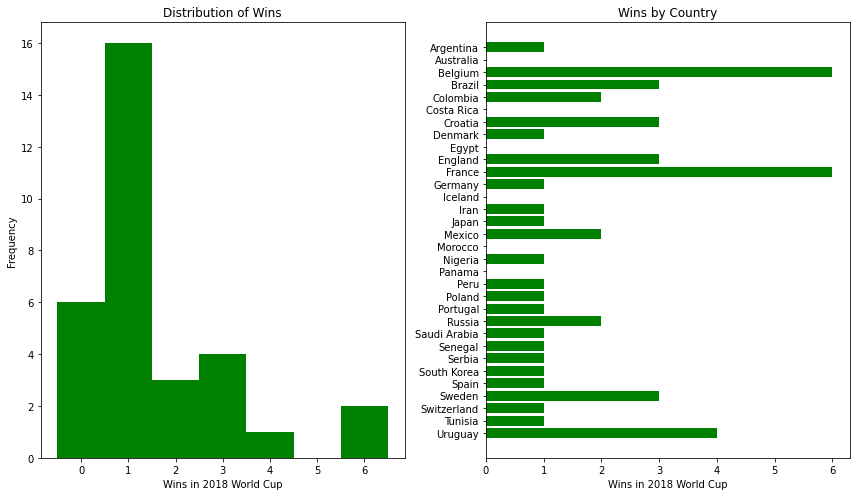

In [21]:
# Run this cell without changes
import matplotlib.pyplot as plt

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
fig.set_tight_layout(True)

# Histogram of Wins and Frequencies
ax1.hist(x=wins, bins=range(8), align="left", color="green")
ax1.set_xticks(range(7))
ax1.set_xlabel("Wins in 2018 World Cup")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Wins")

# Horizontal Bar Graph of Wins by Country
ax2.barh(teams[::-1], wins[::-1], color="green")
ax2.set_xlabel("Wins in 2018 World Cup")
ax2.set_title("Wins by Country");

#### Interpretation of Win Analysis

Before we move to looking at the relationship between wins and population, it's useful to understand the distribution of wins alone. A few notes of interpretation:

* The number of wins is skewed and looks like a [negative binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution), which makes sense conceptually
* The "typical" value here is 1 (both the median and the highest point of the histogram), meaning a typical team that qualifies for the World Cup wins once
* There are a few teams we might consider outliers: Belgium and France, with 6x the wins of the "typical" team and 1.5x the wins of the next "runner-up" (Uruguay, with 4 wins)
* This is a fairly small dataset, something that becomes more noticeable with such a "spiky" (not smooth) histogram


## 3. Associating Countries with 2018 Population

> Add to the existing data structure so that it also connects each country name to its 2018 population, and create visualizations comparable to those from step 2.

Now we're ready to add the 2018 population to `combined_data`, finally using the CSV file!

Recall that `combined_data` currently looks something like this:
```
{
  'Argentina': { 'wins': 1 },
  ...
  'Uruguay':   { 'wins': 4 }
}
```

And the goal is for it to look something like this:
```
{
  'Argentina': { 'wins': 1, 'population': 44494502 },
  ...
  'Uruguay':   { 'wins': 4, 'population': 3449299  }
}
```

To do that, we need to extract the 2018 population information from the CSV data.

### Exploring the Structure of the Population Data CSV

Recall that previously we loaded information from a CSV containing population data into a list of dictionaries called `population_data`.

In [22]:
# Run this cell without changes
len(population_data)

12695

12,695 is a very large number of rows to print out, so let's look at some samples instead.

In [23]:
# Run this cell without changes
np.random.seed(42)
population_record_samples = np.random.choice(population_data, size=10)
population_record_samples

array([{'': '9984', 'Country Name': 'Malta', 'Country Code': 'MLT', 'Year': '1983', 'Value': '330524'},
       {'': '3574', 'Country Name': 'Bahrain', 'Country Code': 'BHR', 'Year': '1994', 'Value': '549583'},
       {'': '8104', 'Country Name': 'Iran, Islamic Rep.', 'Country Code': 'IRN', 'Year': '1988', 'Value': '53077313'},
       {'': '7905', 'Country Name': 'Iceland', 'Country Code': 'ISL', 'Year': '1966', 'Value': '195570'},
       {'': '14678', 'Country Name': 'United Arab Emirates', 'Country Code': 'ARE', 'Year': '1966', 'Value': '159976'},
       {'': '13998', 'Country Name': 'Thailand', 'Country Code': 'THA', 'Year': '1994', 'Value': '58875269'},
       {'': '8448', 'Country Name': 'Jamaica', 'Country Code': 'JAM', 'Year': '1978', 'Value': '2105907'},
       {'': '8979', 'Country Name': 'Kuwait', 'Country Code': 'KWT', 'Year': '1978', 'Value': '1224067'},
       {'': '3180', 'Country Name': 'Argentina', 'Country Code': 'ARG', 'Year': '2013', 'Value': '42202935'},
       {'': 

There are **2 filtering tasks**, **1 data normalization task**, and **1 type conversion task** to be completed, based on what we can see in this sample. We'll walk through each of them below.

(In a more realistic data cleaning environment, you most likely won't happen to get a sample that demonstrates all of the data cleaning steps needed, but this sample was chosen carefully for example purposes.)

### Filtering Population Data

We already should have suspected that this dataset would require some filtering, since there are 32 records in our current `combined_data` dataset and 12,695 records in `population_data`. Now that we have looked at this sample, we can identify 2 features we'll want to use in order to filter down the `population_data` records to just 32. Try to identify them before looking at the answer below.

*Answer: the two features to filter on are* ***`'Country Name'`*** *and* ***`'Year'`***. *We can see from the sample above that there are countries in `population_data` that are not present in `combined_data` (e.g. Malta) and there are years present that are not 2018.*

In the cell below, create a new variable `population_data_filtered` that only includes relevant records from `population_data`. Relevant records are records where the country name is one of the countries in the `teams` list, and the year is "2018".

(It's okay to leave 2018 as a string since we are not performing any math operations on it, just make sure you check for `"2018"` and not `2018`.)

In [24]:
# Replace None with appropriate code

population_data_filtered = []

for record in population_data:
    # Add record to population_data_filtered if relevant
    if record['Country Name'] in combined_data.keys() and record['Year']=='2018':
        population_data_filtered.append(record)

len(population_data_filtered) # 27

27

Hmm...what went wrong? Why do we only have 27 records, and not 32?

Did we really get a dataset with 12k records that's missing 5 of the data points we need?

Let's take a closer look at the population data samples again, specifically the third one:

In [25]:
# Run this cell without changes
population_record_samples[2]

{'': '8104',
 'Country Name': 'Iran, Islamic Rep.',
 'Country Code': 'IRN',
 'Year': '1988',
 'Value': '53077313'}

And compare that with the value for Iran in `teams`:

In [26]:
# Run this cell without changes
teams[13]

'Iran'

Ohhhh...we have a data normalization issue! One dataset refers to this country as `'Iran, Islamic Rep.'`, while the other refers to it as `'Iran'`. This is a common issue we face when using data about countries and regions, where there is no universally-accepted naming convention.

### Normalizing Locations in Population Data

Sometimes data normalization can be a very, very time-consuming task where you need to find "crosswalk" data that can link the two formats together, or you need to write advanced regex formulas to line everything up.

For this task, there are only 5 missing, so we'll just go ahead and give you a function that makes the appropriate substitutions.

In [27]:
# Run this cell without changes
def normalize_location(country_name):
    """
    Given a country name, return the name that the
    country uses when playing in the FIFA World Cup
    """
    name_sub_dict = {
        "Russian Federation": "Russia",
        "Egypt, Arab Rep.": "Egypt",
        "Iran, Islamic Rep.": "Iran",
        "Korea, Rep.": "South Korea",
        "United Kingdom": "England"
    }
    # The .get method returns the corresponding value from
    # the dict if present, otherwise returns country_name
    return name_sub_dict.get(country_name, country_name)

# Example where normalized location is different
print(normalize_location("Russian Federation"))
# Example where normalized location is the same
print(normalize_location("Argentina"))

Russia
Argentina


Now, write new code to create `population_data_filtered` with normalized country names.

In [28]:
# Replace None with appropriate code

population_data_filtered = []

for record in population_data:
    # Get normalized country name
    norm_name = normalize_location(record['Country Name'])
    # Add record to population_data_filtered if relevant
    if norm_name in combined_data.keys() and record['Year']=='2018':
        # Replace the country name in the record
        record['Country Name'] = norm_name
        # Append to list
        population_data_filtered.append(record)
        
len(population_data_filtered) # 32

32

Great, now we should have 32 records instead of 27!

### Type Conversion of Population Data

We need to do one more thing before we'll have population data that is usable for analysis. Take a look at this record from `population_data_filtered` to see if you can spot it:

In [29]:
# Run this cell without changes
population_data_filtered[0]

{'': '3185',
 'Country Name': 'Argentina',
 'Country Code': 'ARG',
 'Year': '2018',
 'Value': '44494502'}

Every key has the same data type (`str`), including the population value. In this example, it's `'44494502'`, when it needs to be `44494502` if we want to be able to compute statistics with it.

In the cell below, loop over `population_data_filtered` and convert the data type of the value associated with the `"Value"` key from a string to an integer, using the built-in `int()` function.

In [30]:
# Replace None with appropriate code
for record in population_data_filtered:
    # Convert the population value from str to int
    record['Value'] = int(record['Value'])
    
# Look at the last record to make sure the population
# value is an int
population_data_filtered[-1]

{'': '14907',
 'Country Name': 'Uruguay',
 'Country Code': 'URY',
 'Year': '2018',
 'Value': 3449299}

Check that it worked with the assert statement below:

In [31]:
# Run this cell without changes
assert type(population_data_filtered[-1]["Value"]) == int

### Adding Population Data

Now it's time to add the population data to `combined_data`! Recall that the data structure currently looks like this:

In [32]:
# Run this cell without changes
combined_data

{'Argentina': {'wins': 1},
 'Australia': {'wins': 0},
 'Belgium': {'wins': 6},
 'Brazil': {'wins': 3},
 'Colombia': {'wins': 2},
 'Costa Rica': {'wins': 0},
 'Croatia': {'wins': 3},
 'Denmark': {'wins': 1},
 'Egypt': {'wins': 0},
 'England': {'wins': 3},
 'France': {'wins': 6},
 'Germany': {'wins': 1},
 'Iceland': {'wins': 0},
 'Iran': {'wins': 1},
 'Japan': {'wins': 1},
 'Mexico': {'wins': 2},
 'Morocco': {'wins': 0},
 'Nigeria': {'wins': 1},
 'Panama': {'wins': 0},
 'Peru': {'wins': 1},
 'Poland': {'wins': 1},
 'Portugal': {'wins': 1},
 'Russia': {'wins': 2},
 'Saudi Arabia': {'wins': 1},
 'Senegal': {'wins': 1},
 'Serbia': {'wins': 1},
 'South Korea': {'wins': 1},
 'Spain': {'wins': 1},
 'Sweden': {'wins': 3},
 'Switzerland': {'wins': 1},
 'Tunisia': {'wins': 1},
 'Uruguay': {'wins': 4}}

The goal is for it to be structured like this:
```
{
  'Argentina': { 'wins': 1, 'population': 44494502 },
  ...
  'Uruguay':   { 'wins': 4, 'population': 3449299  }
}
```

In the cell below, loop over `population_data_filtered` and add information about population to each country in `combined_data`:

In [33]:
# Replace None with appropriate code
for record in population_data_filtered:
    # Extract the country name from the record
    country = record['Country Name']
    # Extract the population value from the record
    population = record['Value']
    # Add this information to combined_data
    combined_data[country].update({'population':population})
    
# Look combined_data
combined_data

{'Argentina': {'wins': 1, 'population': 44494502},
 'Australia': {'wins': 0, 'population': 24982688},
 'Belgium': {'wins': 6, 'population': 11433256},
 'Brazil': {'wins': 3, 'population': 209469333},
 'Colombia': {'wins': 2, 'population': 49648685},
 'Costa Rica': {'wins': 0, 'population': 4999441},
 'Croatia': {'wins': 3, 'population': 4087843},
 'Denmark': {'wins': 1, 'population': 5793636},
 'Egypt': {'wins': 0, 'population': 98423595},
 'England': {'wins': 3, 'population': 66460344},
 'France': {'wins': 6, 'population': 66977107},
 'Germany': {'wins': 1, 'population': 82905782},
 'Iceland': {'wins': 0, 'population': 352721},
 'Iran': {'wins': 1, 'population': 81800269},
 'Japan': {'wins': 1, 'population': 126529100},
 'Mexico': {'wins': 2, 'population': 126190788},
 'Morocco': {'wins': 0, 'population': 36029138},
 'Nigeria': {'wins': 1, 'population': 195874740},
 'Panama': {'wins': 0, 'population': 4176873},
 'Peru': {'wins': 1, 'population': 31989256},
 'Poland': {'wins': 1, 'popu

Check that the types are correct with these assert statements:

In [34]:
# Run this cell without changes
assert type(combined_data["Uruguay"]) == dict
assert type(combined_data["Uruguay"]["population"]) == int

### Analysis of Population

Let's perform the same analysis for population that we performed for count of wins.

#### Statistical Analysis of Population

In [35]:
# Run this cell without changes
populations = [val["population"] for val in combined_data.values()]

print("Mean population:", np.mean(populations))
print("Median population:", np.median(populations))
print("Standard deviation of population:", np.std(populations))

Mean population: 51687460.84375
Median population: 34864542.5
Standard deviation of population: 55195121.60871871


#### Visualizations of Population

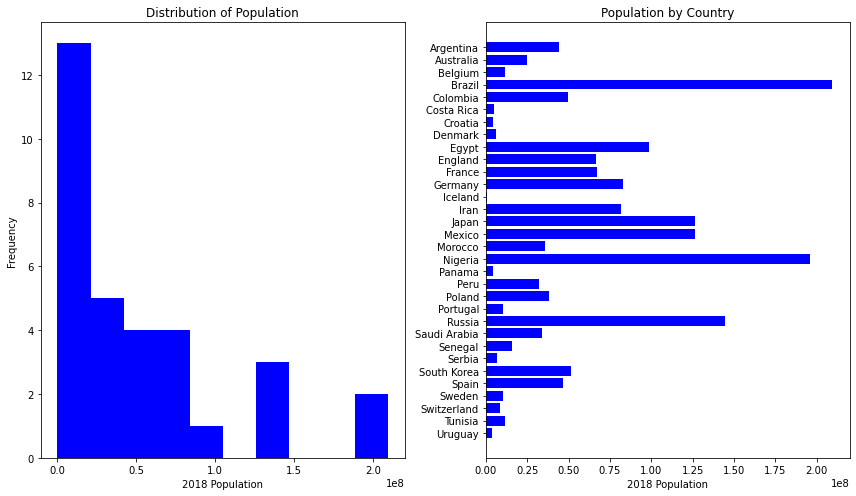

In [36]:
# Run this cell without changes

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
fig.set_tight_layout(True)

# Histogram of Populations and Frequencies
ax1.hist(x=populations, color="blue")
ax1.set_xlabel("2018 Population")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Population")

# Horizontal Bar Graph of Population by Country
ax2.barh(teams[::-1], populations[::-1], color="blue")
ax2.set_xlabel("2018 Population")
ax2.set_title("Population by Country");

#### Interpretation of Population Analysis

* Similar to the distribution of the number of wins, the distribution of population is skewed.
* It's hard to choose a single "typical" value here because there is so much variation.
* The countries with the largest populations (Brazil, Nigeria, and Russia) do not overlap with the countries with the most wins (Belgium, France, and Uruguay)

## 4. Analysis of Population vs. Performance

> Choose an appropriate statistical measure to analyze the relationship between population and performance, and create a visualization representing this relationship.

### Statistical Measure
So far we have learned about only two statistics for understanding the *relationship* between variables: **covariance** and **correlation**. We will use correlation here, because that provides a more standardized, interpretable metric.

In [37]:
# Run this cell without changes
np.corrcoef(wins, populations)[0][1]

0.07592816849178587

In the cell below, interpret this number. What direction is this correlation? Is it strong or weak?

In [38]:
# Replace None with appropriate code
'Positive weak correlation'

'Positive weak correlation'

### Data Visualization

A **scatter plot** is he most sensible form of data visualization for showing this relationship, because we have two dimensions of data, but there is no "increasing" variable (e.g. time) that would indicate we should use a line graph.

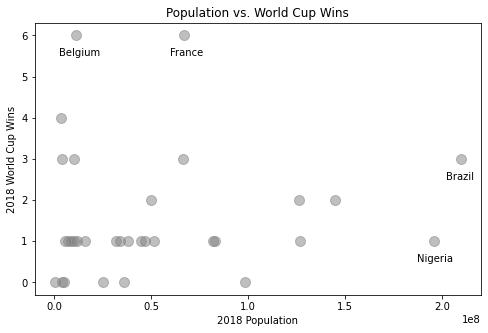

In [39]:
# Run this cell without changes

# Set up figure
fig, ax = plt.subplots(figsize=(8, 5))

# Basic scatter plot
ax.scatter(
    x=populations,
    y=wins,
    color="gray", alpha=0.5, s=100
)
ax.set_xlabel("2018 Population")
ax.set_ylabel("2018 World Cup Wins")
ax.set_title("Population vs. World Cup Wins")

# Add annotations for specific points of interest
highlighted_points = {
    "Belgium": 2, # Numbers are the index of that
    "Brazil": 3,  # country in populations & wins
    "France": 10,
    "Nigeria": 17
}
for country, index in highlighted_points.items():
    # Get x and y position of data point
    x = populations[index]
    y = wins[index]
    # Move each point slightly down and to the left
    # (numbers were chosen by manually tweaking)
    xtext = x - (1.25e6 * len(country))
    ytext = y - 0.5
    # Annotate with relevant arguments
    ax.annotate(
        text=country,
        xy=(x, y),
        xytext=(xtext, ytext)
    )

### Data Visualization Interpretation

Interpret this plot in the cell below. Does this align with the findings from the statistical measure (correlation), as well as the map shown at the beginning of this lab (showing the best results by country)?

In [40]:
# Replace None with appropriate text
'Yes it does align with the staistical measure.  The only similarities to the map in the '+   \
'begining is that France and Brazil stand out.  Other than that, the two visuals are very '+   \
'different.  The above plot is for only one tournament while the map in the beginning is for'+  \
" all World Cups and doesn't show population data at all."

"Yes it does align with the staistical measure.  The only similarities to the map in the begining is that France and Brazil stand out.  Other than that, the two visuals are very different.  The above plot is for only one tournament while the map in the beginning is for all World Cups and doesn't show population data at all."

### Final Analysis

> What is the relationship between the population of a country and their performance in the 2018 FIFA World Cup?

Overall, we found a very weakly positive relationship between the population of a country and their performance in the 2018 FIFA World Cup, as demonstrated by both the correlation between populations and wins, and the scatter plot.

In the cell below, write down your thoughts on these questions:

 - What are your thoughts on why you may see this result?
 - What would you research next?

In [41]:
# Replace None with appropriate text
string_1 = "I wouldn't expect a country's population to have anything to do with their World "+ \
            'Cup performance because if it did, China would win every year.'
string_2 = "I would instead investigate how many players on a country's national team are "+ \
            'currently playing in the top football leagues (Premier League, La Liga, etc.) '+ \
            'and see how that correlates to performance.'
print(string_1)
print()
print(string_2)

I wouldn't expect a country's population to have anything to do with their World Cup performance because if it did, China would win every year.

I would instead investigate how many players on a country's national team are currently playing in the top football leagues (Premier League, La Liga, etc.) and see how that correlates to performance.


## Summary

Congratulations! That was a long lab, pulling together a lot of material. You read data into Python, extracted the relevant information, cleaned the data, and combined the data into a new format to be used in analysis. While we will continue to introduce new tools and techniques, these essential steps will be present for the rest of your data science projects from here on out!

================================================================================================

<a id='my_version'></a>

# MY VERSION
* **I differentiated between types of wins, as well as ties, in the Group Stage, as they would have an effect on which teams made it into the Knockout Rounds and also on overall relative performance.**


* **I also went further than the 'score1' and 'score2' level and determined the winners in extra time, as well as winners in penalty shots, if the Knockout Round matches were tied at the end of regualtion time.**

# WARNING
* **The plots created below use $\boldsymbol{\LaTeX}$ to render text.**


* **Anyone who tries to run my version must have a [$\boldsymbol{\TeX}$ distribution package](https://www.latex-project.org/get/), and you must have the [amsmath](https://ctan.org/pkg/amsmath?lang=en) package installed.**

In [42]:
# Import the necessary modules
#################################################################################################
import json
import csv
#------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
#------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
#------------------------------------------------------------------------------------------------
import seaborn as sns

In [43]:
# Setting up a list of spine sides to iterate through
#################################################################################################
spine_sides = ['left', 'bottom']

# Updating matplotlib rcParams to the desired settings
#################################################################################################
plt.rcParams.update({'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{amsmath}',
                     'font.family': ['sans-serif', 'serif'],
                     'font.sans-serif': ['Verdana'],
                     'font.serif': ['New Century Schoolbook'],
                     'mathtext.fontset': 'cm'})

# Uncomment to check and/or change keys
#################################################################################################
# plt.rcParams.keys()

In [44]:
# Opening and preparing data
#################################################################################################
with open('data/world_cup_2018.json', 'r', encoding='utf-8') as f:
    wc_data = json.load(f)
with open('data/country_populations.csv', 'r') as f:
    country_pops_data = list(csv.reader(f))
    
# Uncomment to check if it worked and see the layout of each file
#################################################################################################
# display(wc_data)
# country_pops_data

In [45]:
# Getting the teams from each match from the json file
#################################################################################################
raw_teams = [(match['team1']['name'],match['team2']['name']) for rnd in wc_data['rounds'] \
             for match in rnd['matches']]
#------------------------------------------------------------------------------------------------
cleaned_teams = [team for match in raw_teams for team in match]
cleaned_teams.sort()

# Uncomment to check if it worked
#################################################################################################
# print(raw_teams)
# print('')
# print(cleaned_teams)

In [46]:
# Getting the necessary information from the json file and creating a dict of all results
#################################################################################################
all_results = {}
#------------------------------------------------------------------------------------------------
for team in list(set(cleaned_teams)):
    all_results[team] = {'Kn_W':0,'Kn_L':0,'Gr_W':0,'Gr_T':0,'Gr_L':0}
#------------------------------------------------------------------------------------------------
for rnd in wc_data['rounds']:
    #--------------------------------------------------------------------------------------------
    if 'Matchday' in rnd['name']:
        #----------------------------------------------------------------------------------------
        raw_winners = [match['team1']['name'] for match in rnd['matches'] \
                       if (match['score1']>match['score2']) \
                       and (match['score1']!=match['score2'])]
        [raw_winners.append(match['team2']['name']) for match in rnd['matches'] \
         if (match['score2']>match['score1']) and (match['score1']!=match['score2'])]
        #----------------------------------------------------------------------------------------
        raw_ties = [(match['team1']['name'],match['team2']['name']) for match in rnd['matches'] \
                    if (match['score1']==match['score2'])]
        #----------------------------------------------------------------------------------------
        cleaned_ties = [team for match in raw_ties for team in match]
        #----------------------------------------------------------------------------------------
        raw_losers = [match['team1']['name'] for match in rnd['matches'] \
                      if (match['score1']<match['score2']) \
                      and (match['score1']!=match['score2'])]
        [raw_losers.append(match['team2']['name']) for match in rnd['matches'] \
         if (match['score2']<match['score1']) and (match['score1']!=match['score2'])]
        #----------------------------------------------------------------------------------------
        for team in raw_winners:
            all_results[team]['Gr_W'] += 1
        #----------------------------------------------------------------------------------------
        for team in cleaned_ties:
            all_results[team]['Gr_T'] += 1
        #----------------------------------------------------------------------------------------
        for team in raw_losers:
            all_results[team]['Gr_L'] += 1
    #--------------------------------------------------------------------------------------------
    if 'Matchday' not in rnd['name']:
        #----------------------------------------------------------------------------------------
        for match in rnd['matches']:
            winner = match['team1']['name'] if match['score1']>match['score2'] \
                     else match['team2']['name']
            loser = match['team1']['name'] if match['score1']<match['score2'] \
                    else match['team2']['name']
            #------------------------------------------------------------------------------------
            if match['score1']==match['score2']:
                winner = match['team1']['name'] if match['score1et']>match['score2et'] \
                         else match['team2']['name']
                loser = match['team1']['name'] if match['score1et']<match['score2et'] \
                        else match['team2']['name']
                #--------------------------------------------------------------------------------
            if match['score1et']==match['score2et'] and match['score1et']!=None:                 
                winner = match['team1']['name'] if match['score1p']>match['score2p'] \
                         else match['team2']['name']
                loser = match['team1']['name'] if match['score1p']<match['score2p'] \
                        else match['team2']['name']
                #--------------------------------------------------------------------------------
            all_results[winner]['Kn_W'] += 1
            all_results[loser]['Kn_L'] += 1
            
# Uncomment to check if it worked
#################################################################################################
# display(all_results)

In [47]:
# Constructing, sorting, and adding to dictionaries to turn into a clean df of the necessary 
# information
#################################################################################################
team_appearances = {}
for team in cleaned_teams:
    if team in team_appearances.keys():
        team_appearances[team] += 1
    else:
        team_appearances[team] = 1
#------------------------------------------------------------------------------------------------
final_teams = sorted(all_results, key=lambda team:(all_results[team]['Kn_W'],
                                                   all_results[team]['Kn_L'],
                                                   all_results[team]['Gr_W'],
                                                   all_results[team]['Gr_T']), reverse=True)
#------------------------------------------------------------------------------------------------
final_table = {}
for team in final_teams:
    final_table[team] = all_results[team]
    final_table[team]['GP'] = team_appearances[team]
    df_cols = final_table[team].keys()
#------------------------------------------------------------------------------------------------
table_df = pd.DataFrame(final_table.values(), index=final_table.keys(), columns=df_cols)

# Uncomment to check if it worked
#################################################################################################
# display(table_df)

In [48]:
# Function to get a color between a given color and pure white based on a number between 0 and 1.
# A higher light_frac results in lighter color.
#################################################################################################
def get_lighter_color(color_name, light_frac):
    color_map = LinearSegmentedColormap.from_list('', [color_name,'w'], N=9)
    return color_map(light_frac)

# Distribution of Wins Per Country

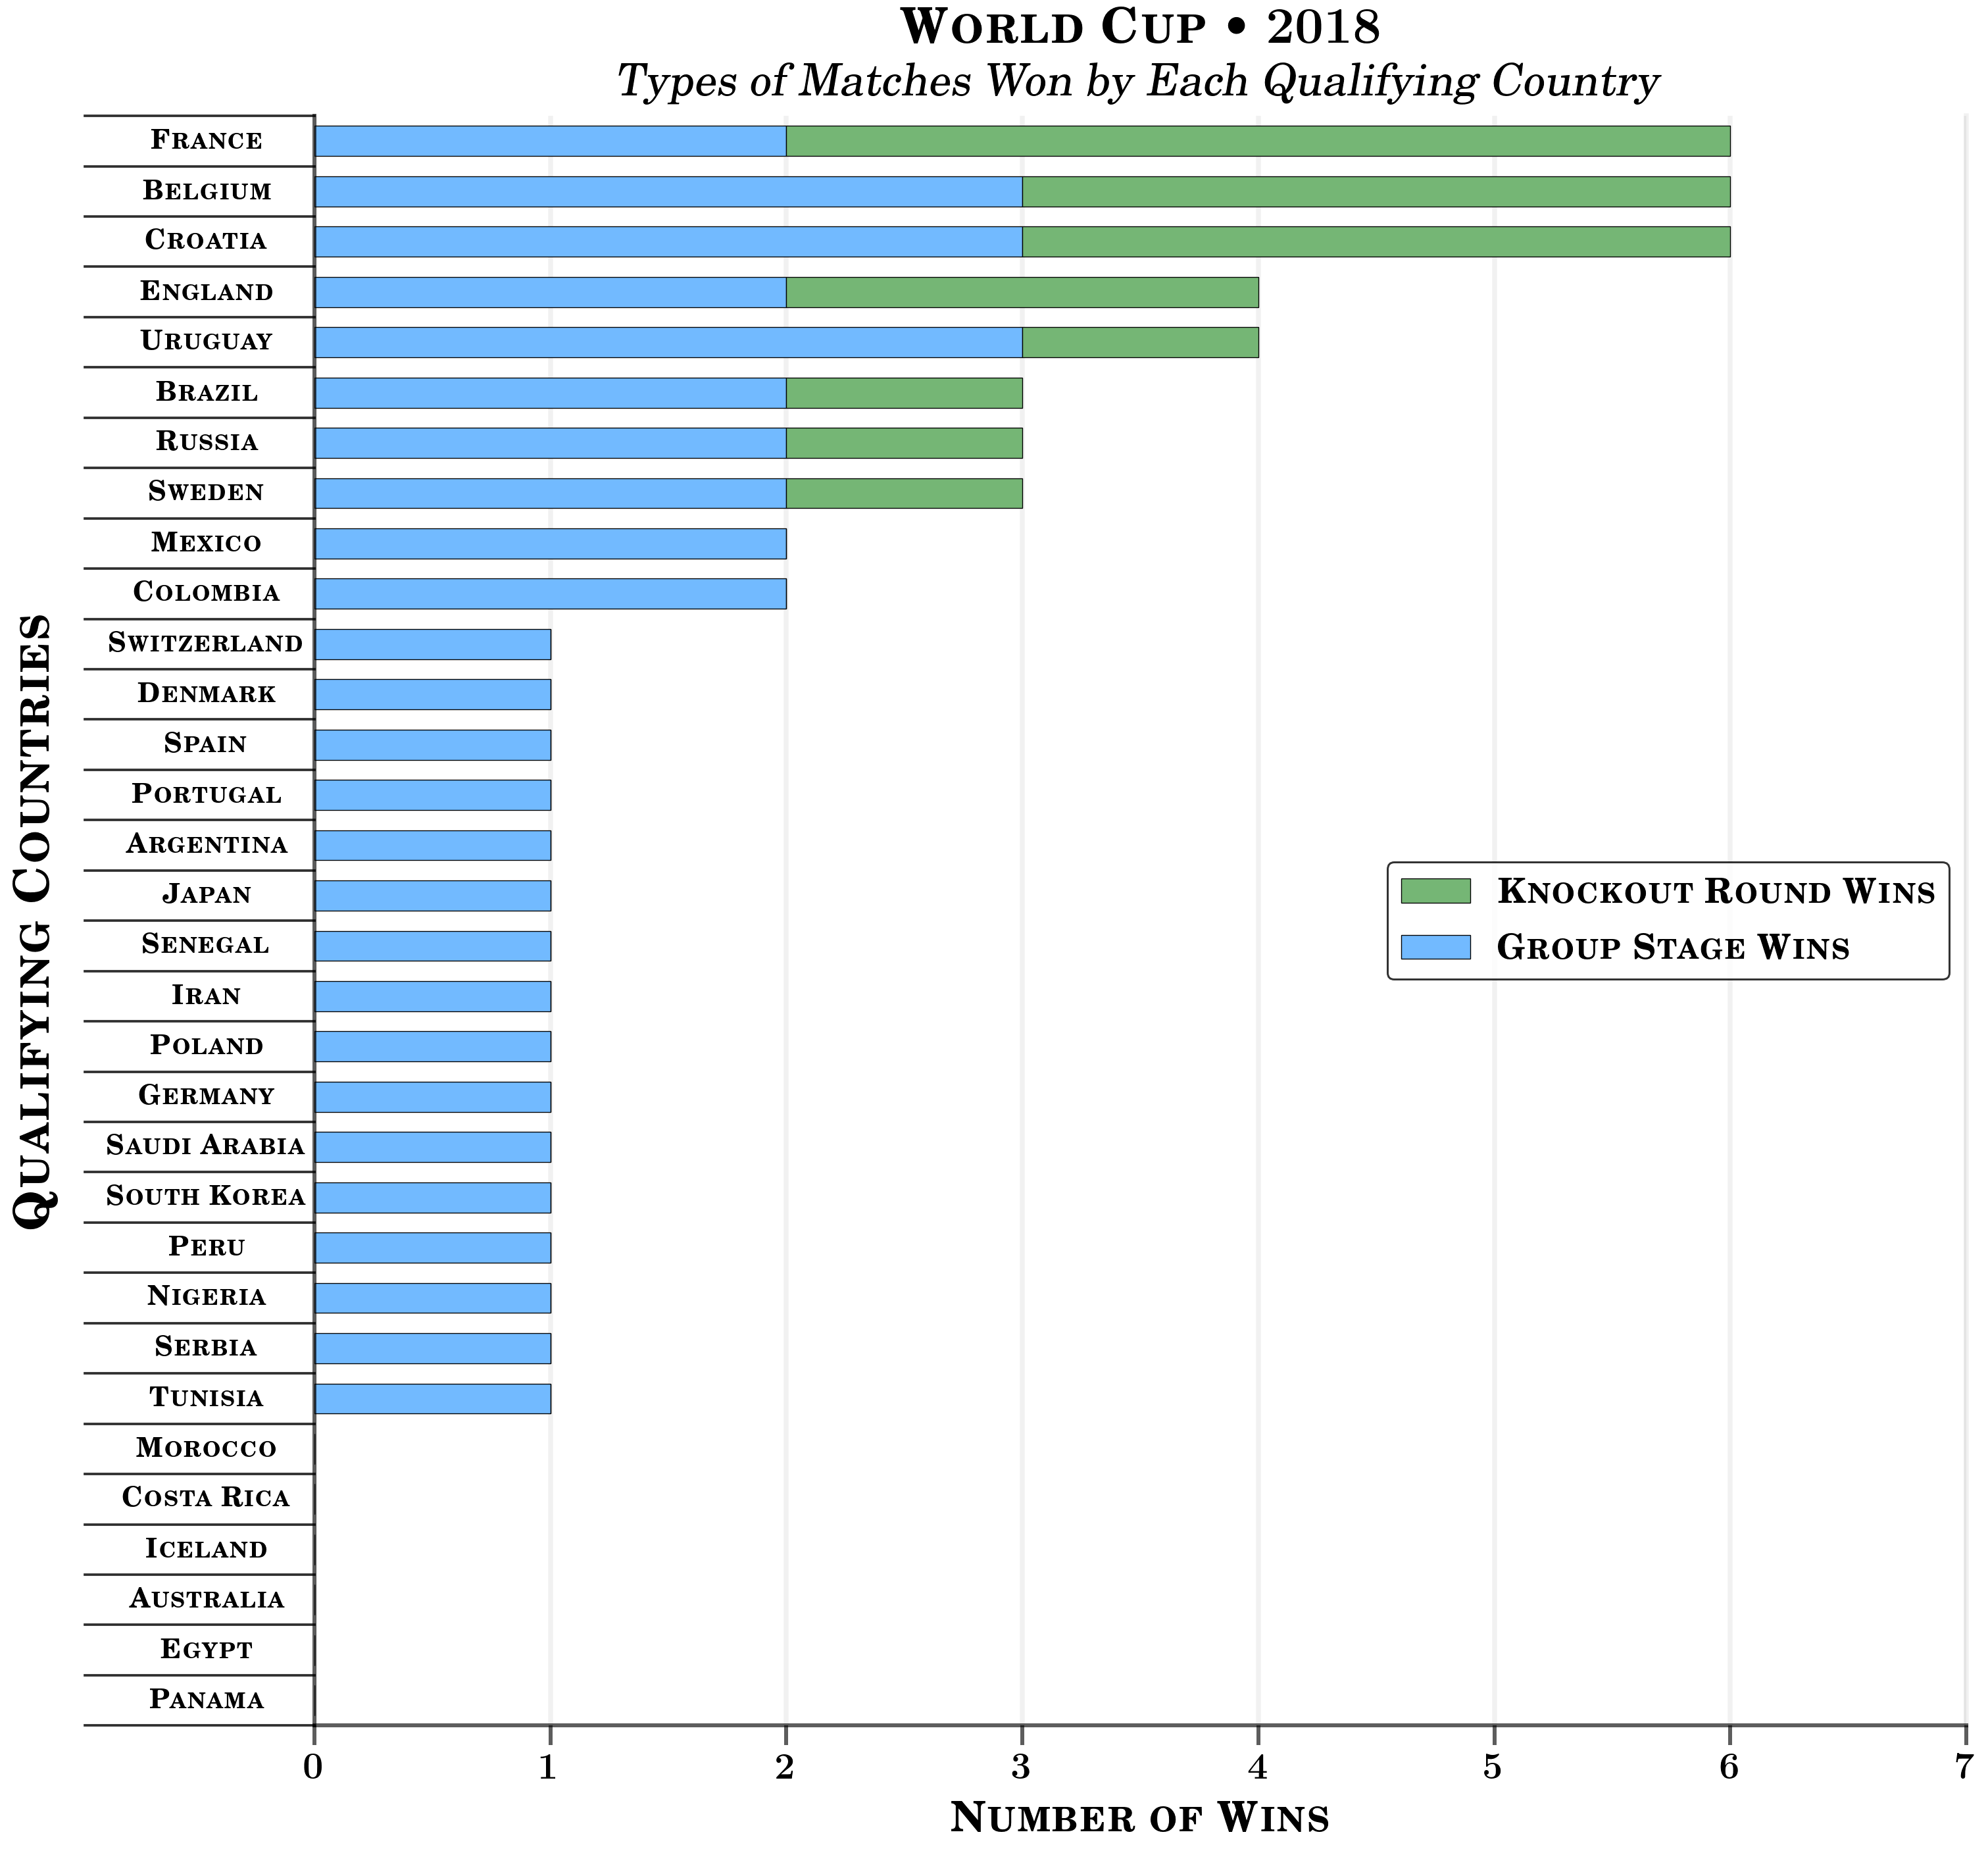

In [76]:
# Preparing other necesary information for plotting
#################################################################################################
fin_countries = list(table_df.index)
#------------------------------------------------------------------------------------------------
num_bars = 2
bar_height = 3
group_space = 6
y_locs = range(len(fin_countries))

# Locations for bars
#################################################################################################
y_ticks = [num_bars*group_space*y for y in y_locs]
#------------------------------------------------------------------------------------------------
split_dist = ((y_ticks[1]-y_ticks[0])/2)
split_locs = [(num_bars*group_space)*y + split_dist for y in y_locs[0:-1]]

# Setting up the figure and the axes
#################################################################################################
fig = plt.figure(figsize=(18,18), dpi=180)
gs = fig.add_gridspec()
ax  = gs.subplots()
renderer = fig.canvas.get_renderer()

# Getting and plotting the data
#################################################################################################
ax_bars_kw = dict(height=bar_height*2.4, ec='k', lw='.54', zorder=3)

# Getting and plotting the data
#################################################################################################
bars_kw = dict(ec='k', lw='.54', zorder=3)
#------------------------------------------------------------------------------------------------
bar_colors = []
bar_patches = []
for color in ['forestgreen', 'dodgerblue']:
    faded_color = get_lighter_color(color, .36)
    new_patch = mpatches.Patch(color=faded_color, **bars_kw)
    bar_colors.append(faded_color)
    bar_patches.append(new_patch)
#------------------------------------------------------------------------------------------------
for country,  y_t in zip(fin_countries, y_ticks):
    ax.barh(y_t, table_df.loc[country]['Gr_W'], color=bar_colors[1], **ax_bars_kw)
    ax.barh(y_t, table_df.loc[country]['Kn_W'], left=table_df.loc[country]['Gr_W'], 
             color=bar_colors[0], **ax_bars_kw)
    
# Y Tick, Tick Labels and Bounds for both plots
#################################################################################################
y_labels = [r'\textbf{\scshape{'+country+'}}' for c_i, country in enumerate(fin_countries)]
#------------------------------------------------------------------------------------------------
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, va='center')
ax.set_ybound((y_ticks[0] - split_dist, y_ticks[-1] + split_dist))
ax.invert_yaxis()
        
# X Ticks, TIck Labels, Bounds and Labels for both plots
#################################################################################################

#------------------------------------------------------------------------------------------------
x_list = list(range(0,8))
x_labels = [r'$\mathbf{'+str(x_t)+'}$' for x_t in x_list]
#------------------------------------------------------------------------------------------------
ax.set_xticks(x_list)
ax.set_xticklabels(x_labels)

#------------------------------------------------------------------------------------------------
ax.set_xbound(0, 7)

# Tick Params
#################################################################################################
grid_kw = dict(color='dimgrey', linewidth=3, zorder=0)
maj_gr_kw = dict(length=12, width=2.4, labelsize=22.5, labelcolor='k', color=(0,0,0,.63))
#------------------------------------------------------------------------------------------------
maj_reg_kw = dict(length=0, width=2.4, labelsize=16.5, labelcolor='k', color=(0,0,0,.63))
#------------------------------------------------------------------------------------------------
top_spine_kw = dict(color='dimgrey', linewidth=3, zorder=0, alpha=.09)
spine_kw = dict(color='k', lw=2.4, alpha=.63, zorder=9)
#------------------------------------------------------------------------------------------------
ax.grid(True, which='major', axis='x', alpha=.09, **grid_kw)
#------------------------------------------------------------------------------------------------
ax.tick_params('x', **maj_gr_kw)
#------------------------------------------------------------------------------------------------
ax.tick_params('y', **maj_reg_kw)
#------------------------------------------------------------------------------------------------
[ax.spines[side].update(spine_kw) for side in spine_sides]
ax.spines['right'].update(top_spine_kw)
ax.spines['top'].set_visible(False)

# Setting the titles
#################################################################################################
x_lab_kw = dict(size=25.5, labelpad=9)
y_lab_kw= dict(size=30, labelpad=30)
tit_kw = dict(pad=12, linespacing=1.5)
#------------------------------------------------------------------------------------------------
x_lab = 'Number of Wins'
y_lab = 'Qualifying Countries'
#------------------------------------------------------------------------------------------------
ax.set_xlabel(r'\textbf{\scshape{'+x_lab+'}}', **x_lab_kw)
ax.set_ylabel(r'\textbf{\scshape{'+y_lab+'}}', **y_lab_kw)
#------------------------------------------------------------------------------------------------
tit_p1 = r'{\fontsize{30}{0}\selectfont{\textbf{\scshape{World Cup \textbullet\ }}}'+   \
         r'{\fontsize{31.5}{0}\selectfont{$\mathbf{2018}$}'+'\n'
#------------------------------------------------------------------------------------------------
tit_p2 = r'{\fontsize{27}{0}\selectfont{\textsl{Types of Matches '+  \
         r'Won by Each Qualifying Country}}}'
#------------------------------------------------------------------------------------------------
ax.set_title(tit_p1 + tit_p2, **tit_kw)

# Setting the legends
#################################################################################################
leg_font_kw = dict(size=21)
leg_kw = dict(bbox_to_anchor=(1,.5), loc='center right', prop=leg_font_kw, labelspacing=.63)
frame_kw = dict(lw=1.2, ec='k')
#------------------------------------------------------------------------------------------------
leg_texts = ['Knockout Round Wins', 'Group Stage Wins']
leg_labels = [r'\textbf{\scshape{'+l_text+'}}' for l_text in leg_texts]
#------------------------------------------------------------------------------------------------
leg = ax.legend(handles=bar_patches, labels=leg_labels, **leg_kw)
plt.setp(leg.get_frame(), **frame_kw)

# Adding lines between each country's name (lines between y tick labels)
#################################################################################################
c_grid_kw = dict(color='k', lw=3, alpha=.09)
c_tick_kw = dict(clip_on=False, color='k', lw=1.5, alpha=.81)
#------------------------------------------------------------------------------------------------
top_spl = y_ticks[-1] + split_dist
bot_spl = y_ticks[0] - split_dist
#------------------------------------------------------------------------------------------------
max_label_neg_x = 0
ax_inv = ax.transAxes.inverted()
#------------------------------------------------------------------------------------------------
for label in ax.get_ymajorticklabels():
    lab_xymin = label.get_tightbbox(renderer).min
    #--------------------------------------------------------------------------------------------
    a_f_bbox_xymin = ax_inv.transform(lab_xymin)
    #--------------------------------------------------------------------------------------------
    if a_f_bbox_xymin[0]<=max_label_neg_x:
        max_label_neg_x = a_f_bbox_xymin[0]
#------------------------------------------------------------------------------------------------
pos_kw = dict(x=(max_label_neg_x/2), ha='center')
[label.update(pos_kw) for label in ax.get_ymajorticklabels()]
#------------------------------------------------------------------------------------------------
for s_loc in split_locs:
    ax.axhline(s_loc, 0, max_label_neg_x-.015, **c_tick_kw)
#------------------------------------------------------------------------------------------------
ax.axhline(bot_spl, 0, max_label_neg_x-.015, **c_tick_kw)
#------------------------------------------------------------------------------------------------
ax.axhline(top_spl, 0, max_label_neg_x-.015, **c_tick_kw)
    
# Saving and showing the plots
#################################################################################################
fig.savefig('visuals\Types of Wins or Ties.jpeg', bbox_inches='tight')
#------------------------------------------------------------------------------------------------
plt.show()

# Distribution of Wins and Populations Per Country

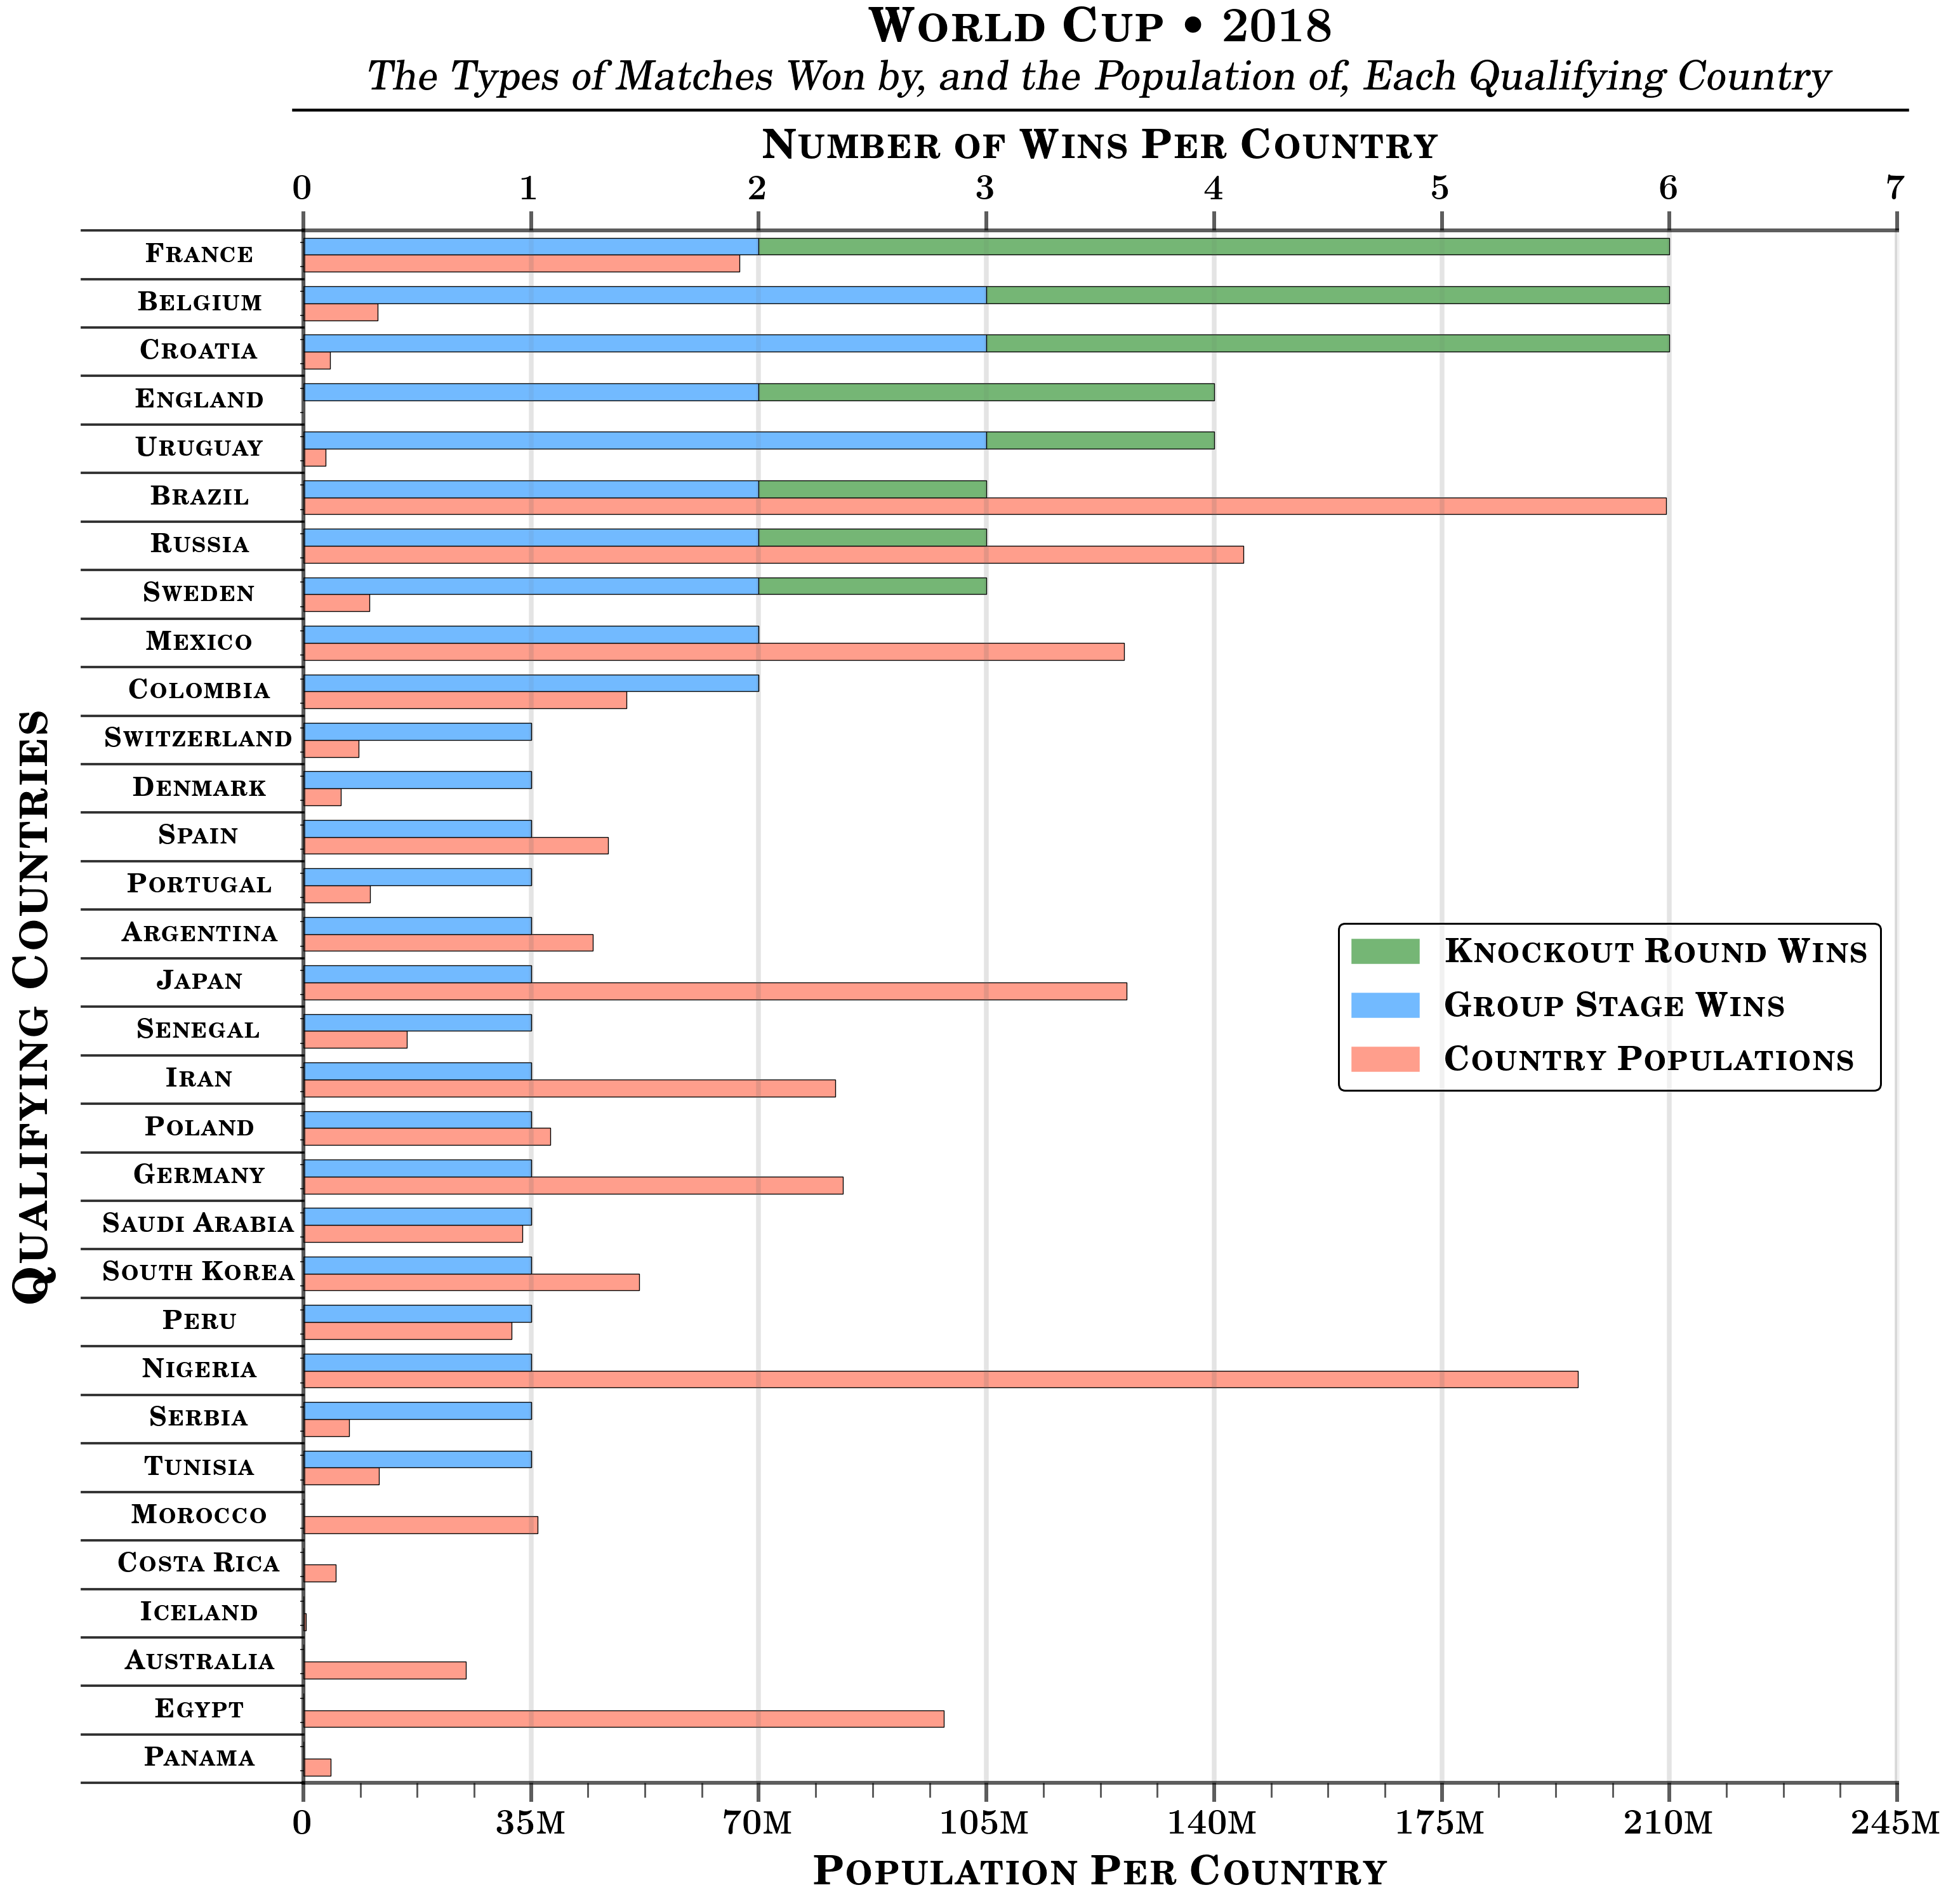

In [75]:
# Adding the data while correcting for countries being referred to differently and constructing 
# temp df
#################################################################################################
fin_keys = final_table.keys()
for row in country_pops_data:
    k_update = True if row[1] in fin_keys and row[3]=='2018' else False
    russia = True if 'Russia' in row[1] and row[3]=='2018' else False
    iran = True if 'Iran' in row[1] and row[3]=='2018' else False
    korea = True if row[1]=='Korea, Rep.' and row[3]=='2018' else False
    egypt = True if 'Egypt' in row[1] and row[3]=='2018' else False
    #--------------------------------------------------------------------------------------------
    if russia:
        final_table['Russia'].update({'Population':row[-1]})
    if iran:
        final_table['Iran'].update({'Population':row[-1]})
    if korea:
        final_table['South Korea'].update({'Population':row[-1]})
    if egypt:
        final_table['Egypt'].update({'Population':row[-1]})
    if k_update and not russia and not iran and not korea and not egypt:
        final_table[row[1]].update({'Population':row[-1]})
        df_cols = final_table[row[1]].keys()
#------------------------------------------------------------------------------------------------
table_df = pd.DataFrame(final_table.values(), index=final_table.keys(), columns=df_cols)
pop_ser = table_df['Population'].apply(float)

# Function to format population ticks
#################################################################################################
def format_pop(x, pos):
    if x>=1e9:
        s = r'{$\mathbf{'+'{:.3f}'.format(x*1e-9)+'}$'+   \
            r'{\fontsize{19.5}{0}\selectfont{\scshape{B}}}'
    if 1e6<=x<1e9:
        s = r'{$\mathbf{'+'{:.0f}'.format(x*1e-6)+'}$'+   \
            r'{\fontsize{19.5}{0}\selectfont{\scshape{M}}}'
    if 1e3<=x<1e6:
        s = r'{$\mathbf{'+'{:.0f}'.format(x*1e-3)+'}$'+   \
            r'{\fontsize{19.5}{0}\selectfont{\scshape{K}}}'
    if 0<x<1e3:
        s = r'{$\mathbf{'+'{:.0f}'.format(x)+'}$'
    if x==0:
        s = r'{$\mathbf{'+str(0)+'}$'
    return s

# Locations for bars and other necessary plotting info
#################################################################################################
fin_countries = list(table_df.index)
#------------------------------------------------------------------------------------------------
num_bars = 2
bar_height = 4.2
group_space = 6
y_locs = range(len(fin_countries))
#------------------------------------------------------------------------------------------------
y_d1 = [num_bars*group_space*y + bar_height for y in y_locs]
y_ticks = [num_bars*group_space*y + bar_height*(1.5) for y in y_locs]
y_d2 = [num_bars*group_space*y + bar_height*2 for y in y_locs]
#------------------------------------------------------------------------------------------------
split_dist = ((y_ticks[1]-y_ticks[0])/2)
split_locs = [(num_bars*group_space)*y + bar_height*(1.5) + split_dist for y in y_locs[0:-1]]

# Setting up the figure and the axes
#################################################################################################
fig = plt.figure(figsize=(18,18), dpi=180)
gs = fig.add_gridspec(1)
ax1 = gs.subplots()
ax2 = ax1.twiny()
renderer = fig.canvas.get_renderer()

# Getting and plotting the data
#################################################################################################
bars_kw = dict(height=bar_height, ec='k', lw='.54', zorder=1)
#------------------------------------------------------------------------------------------------
bar_colors = []
bar_patches = []
for color in ['forestgreen', 'dodgerblue', 'tomato']:
    faded_color = get_lighter_color(color, .36)
    new_patch = mpatches.Patch(color=faded_color)
    bar_colors.append(faded_color)
    bar_patches.append(new_patch)
#------------------------------------------------------------------------------------------------
ax1.barh(y_d2, pop_ser, color=bar_colors[-1], **bars_kw)
#------------------------------------------------------------------------------------------------
ax2.barh(y_d1, table_df['Gr_W'], color=bar_colors[1], **bars_kw)
ax2.barh(y_d1, table_df['Kn_W'], left=table_df['Gr_W'], color=bar_colors[0], **bars_kw)

# Y Ticks for both plots
#################################################################################################
y_labels = [r'\textbf{\scshape{'+country+'}}' for c_i, country in enumerate(fin_countries)]
for i_ax in [ax1, ax2]:
    i_ax.set_yticks(y_ticks)
    i_ax.set_ybound((y_ticks[0] - split_dist, y_ticks[-1] + split_dist))
#------------------------------------------------------------------------------------------------
ax1.set_yticklabels(y_labels, va='center')
ax1.invert_yaxis()
#------------------------------------------------------------------------------------------------
plt.setp(ax2.get_yticklabels(), visible=False)

# AX2 - X Ticks and Labels
#################################################################################################
x_list = list(range(0, 8))
ax2.set_xticks(x_list)
ax2.set_xticklabels([r'$\mathbf{'+str(x_t)+'}$' for x_t in x_list])
ax2.set_xbound(0, 7)

# AX1 - X Ticks and Labels
#################################################################################################
x_max = pop_ser.max()
#------------------------------------------------------------------------------------------------
right_found = False
test_x = 5*1e7
while not (right_found):
    if (x_max + 3.5*1e7)<=test_x:
        x_max = test_x
        right_found = True
    else:
        test_x += 5*1e6
#------------------------------------------------------------------------------------------------
x_step = x_max/7
#------------------------------------------------------------------------------------------------
x_tick_max = x_max 
x_ticks = np.arange(0, x_tick_max+1, x_step)
#------------------------------------------------------------------------------------------------
ax1.set_xticks(x_ticks)
ax1.xaxis.set_major_formatter(format_pop)
ax1.set_xbound(lower=0, upper=x_tick_max)

# Tick Params and Spines for Both Plots
#################################################################################################
grid_kw = dict(color='dimgrey', linewidth=3, zorder=0)
maj_gr_kw = dict(length=12, width=2.4, labelsize=22.5, labelcolor='k', color=(0,0,0,.63))
min_gr_kw = dict(length=9, width=1.2, color=(0,0,0,.63))
#------------------------------------------------------------------------------------------------
maj_reg_kw = dict(length=0, width=2.4, labelsize=16.5, labelcolor='k', color=(0,0,0,.63))
#------------------------------------------------------------------------------------------------
right_spine_kw = dict(color='dimgrey', linewidth=3, zorder=0, alpha=.09)
spine_kw = dict(color='k', lw=2.4, alpha=.63, zorder=9)
#------------------------------------------------------------------------------------------------
for i_ax in [ax1, ax2]:
    #--------------------------------------------------------------------------------------------
    i_ax.grid(True, which='major', axis='x', alpha=.09, **grid_kw)
    #--------------------------------------------------------------------------------------------
    i_ax.tick_params('x', **maj_gr_kw)
    #--------------------------------------------------------------------------------------------
    i_ax.tick_params('y', **maj_reg_kw)
#------------------------------------------------------------------------------------------------
ax1.minorticks_on()
ax1.tick_params('x', which='minor', **min_gr_kw)
#------------------------------------------------------------------------------------------------
twin_spines = spine_sides.copy()
twin_spines.append('top')
[ax2.spines[side].update(spine_kw) for side in twin_spines]
ax2.spines['right'].update(right_spine_kw)
#------------------------------------------------------------------------------------------------
orig_spines = spine_sides.copy()
orig_spines.extend(['top', 'right'])
[ax1.spines[side].set_visible(False) for side in orig_spines]

# Setting the titles
#################################################################################################
tit_kw = dict(pad=24, linespacing=1.5)
x_lab_kw= dict(size=25.5, labelpad=9)
y_lab_kw= dict(size=30, labelpad=30)
#------------------------------------------------------------------------------------------------
x_lab_bot = 'Population Per Country'
x_lab_top = 'Number of Wins Per Country'
#------------------------------------------------------------------------------------------------
y_lab = 'Qualifying Countries'
#------------------------------------------------------------------------------------------------
ax1.set_xlabel(r'\textbf{\scshape{'+x_lab_bot+'}}', **x_lab_kw)
ax2.set_xlabel(r'\textbf{\scshape{'+x_lab_top+'}}', **x_lab_kw)
#------------------------------------------------------------------------------------------------
ax1.set_ylabel(r'\textbf{\scshape{'+y_lab+'}}', **y_lab_kw)
#------------------------------------------------------------------------------------------------
tit_p1 = r'{\fontsize{30}{0}\selectfont{\textbf{\scshape{World Cup \textbullet\ }}}}'
year_tex = r'{\fontsize{31.5}{0}\selectfont{$\mathbf{2018}$}}'
#------------------------------------------------------------------------------------------------
tit_p2 = r'{\fontsize{25.5}{0}\selectfont{\textsl{The Types of Matches Won by, and the }}}'+  \
         r'{\fontsize{25.5}{0}\selectfont{\textsl{Population of, }}}'+   \
         r'{\fontsize{25.5}{0}\selectfont{\textsl{Each Qualifying Country}}}'
#------------------------------------------------------------------------------------------------
ax1.set_title(tit_p1 + year_tex + '\n' + tit_p2, **tit_kw)

# Setting the legends
#################################################################################################
leg_font_kw = dict(size=21)
leg_kw = dict(bbox_to_anchor=(1,.5), loc='center right', prop=leg_font_kw, labelspacing=.63)
frame_kw = dict(lw=1.2, ec='k', alpha=1)
#------------------------------------------------------------------------------------------------
leg_texts = ['Knockout Round Wins', 'Group Stage Wins', 'Country Populations']
leg_labels = [r'\textbf{\scshape{'+l_text+'}}' for l_text in leg_texts]
leg = ax1.legend(handles=bar_patches, labels=leg_labels, **leg_kw)
#------------------------------------------------------------------------------------------------
plt.setp(leg.get_frame(), **frame_kw)
#------------------------------------------------------------------------------------------------
leg_txts = leg.get_texts()
for txt in leg_txts:
    txt.set_ma('center')
    txt.set_linespacing(1.5)
    
# Adding lines between each country's name (lines between y tick labels) and data (custom 
# horizontal grid lines)
#################################################################################################
c_tick_kw = dict(clip_on=False, color='k', lw=1.5, alpha=.81, zorder=9)
#------------------------------------------------------------------------------------------------
top_spl = y_ticks[-1] + split_dist
bot_spl = y_ticks[0] - split_dist
#------------------------------------------------------------------------------------------------
max_label_neg_x = 0
ax_inv = ax1.transAxes.inverted()
#------------------------------------------------------------------------------------------------
for label in ax1.get_ymajorticklabels():
    lab_xymin = label.get_tightbbox(renderer).min
    #--------------------------------------------------------------------------------------------
    lab_f_bbox_xymin = ax_inv.transform(lab_xymin)
    #--------------------------------------------------------------------------------------------
    if lab_f_bbox_xymin[0]<=max_label_neg_x:
        max_label_neg_x = lab_f_bbox_xymin[0]
#------------------------------------------------------------------------------------------------
pos_kw = dict(x=(max_label_neg_x/2), ha='center')
[label.update(pos_kw) for label in ax1.get_ymajorticklabels()]
#------------------------------------------------------------------------------------------------
for s_loc in split_locs:
    ax1.axhline(s_loc, 0, max_label_neg_x-.015, **c_tick_kw)
#------------------------------------------------------------------------------------------------
ax1.axhline(bot_spl, 0, max_label_neg_x-.015, **c_tick_kw)
#------------------------------------------------------------------------------------------------
ax1.axhline(top_spl, 0, max_label_neg_x-.015, **c_tick_kw)

# Adding line between ax2 y label and title 
#################################################################################################
div_kw = dict(color='k', lw=1.8)#, alpha=.63)
#------------------------------------------------------------------------------------------------
fig_inv = fig.transFigure.inverted()
#------------------------------------------------------------------------------------------------
ax_xymin = ax2.get_tightbbox(renderer).min
ax_xymax = ax2.get_tightbbox(renderer).max
top_lab_xymax = ax2.xaxis.get_label().get_tightbbox(renderer).max
#------------------------------------------------------------------------------------------------
div_left_x = fig_inv.transform(ax_xymin)[0]
div_right_x = fig_inv.transform(ax_xymax)[0]
div_y = fig_inv.transform(top_lab_xymax)[1] + .009
#------------------------------------------------------------------------------------------------
div_line = mlines.Line2D([div_left_x, div_right_x], [div_y, div_y], **div_kw)
#------------------------------------------------------------------------------------------------
fig.add_artist(div_line)

# Saving and showing the plots
#################################################################################################
fig.savefig('visuals\Types of Wins or Tie and Country Populations.jpeg', bbox_inches='tight')
#------------------------------------------------------------------------------------------------
plt.show()

# Relationship Between World Cup Performance and a Country's Population

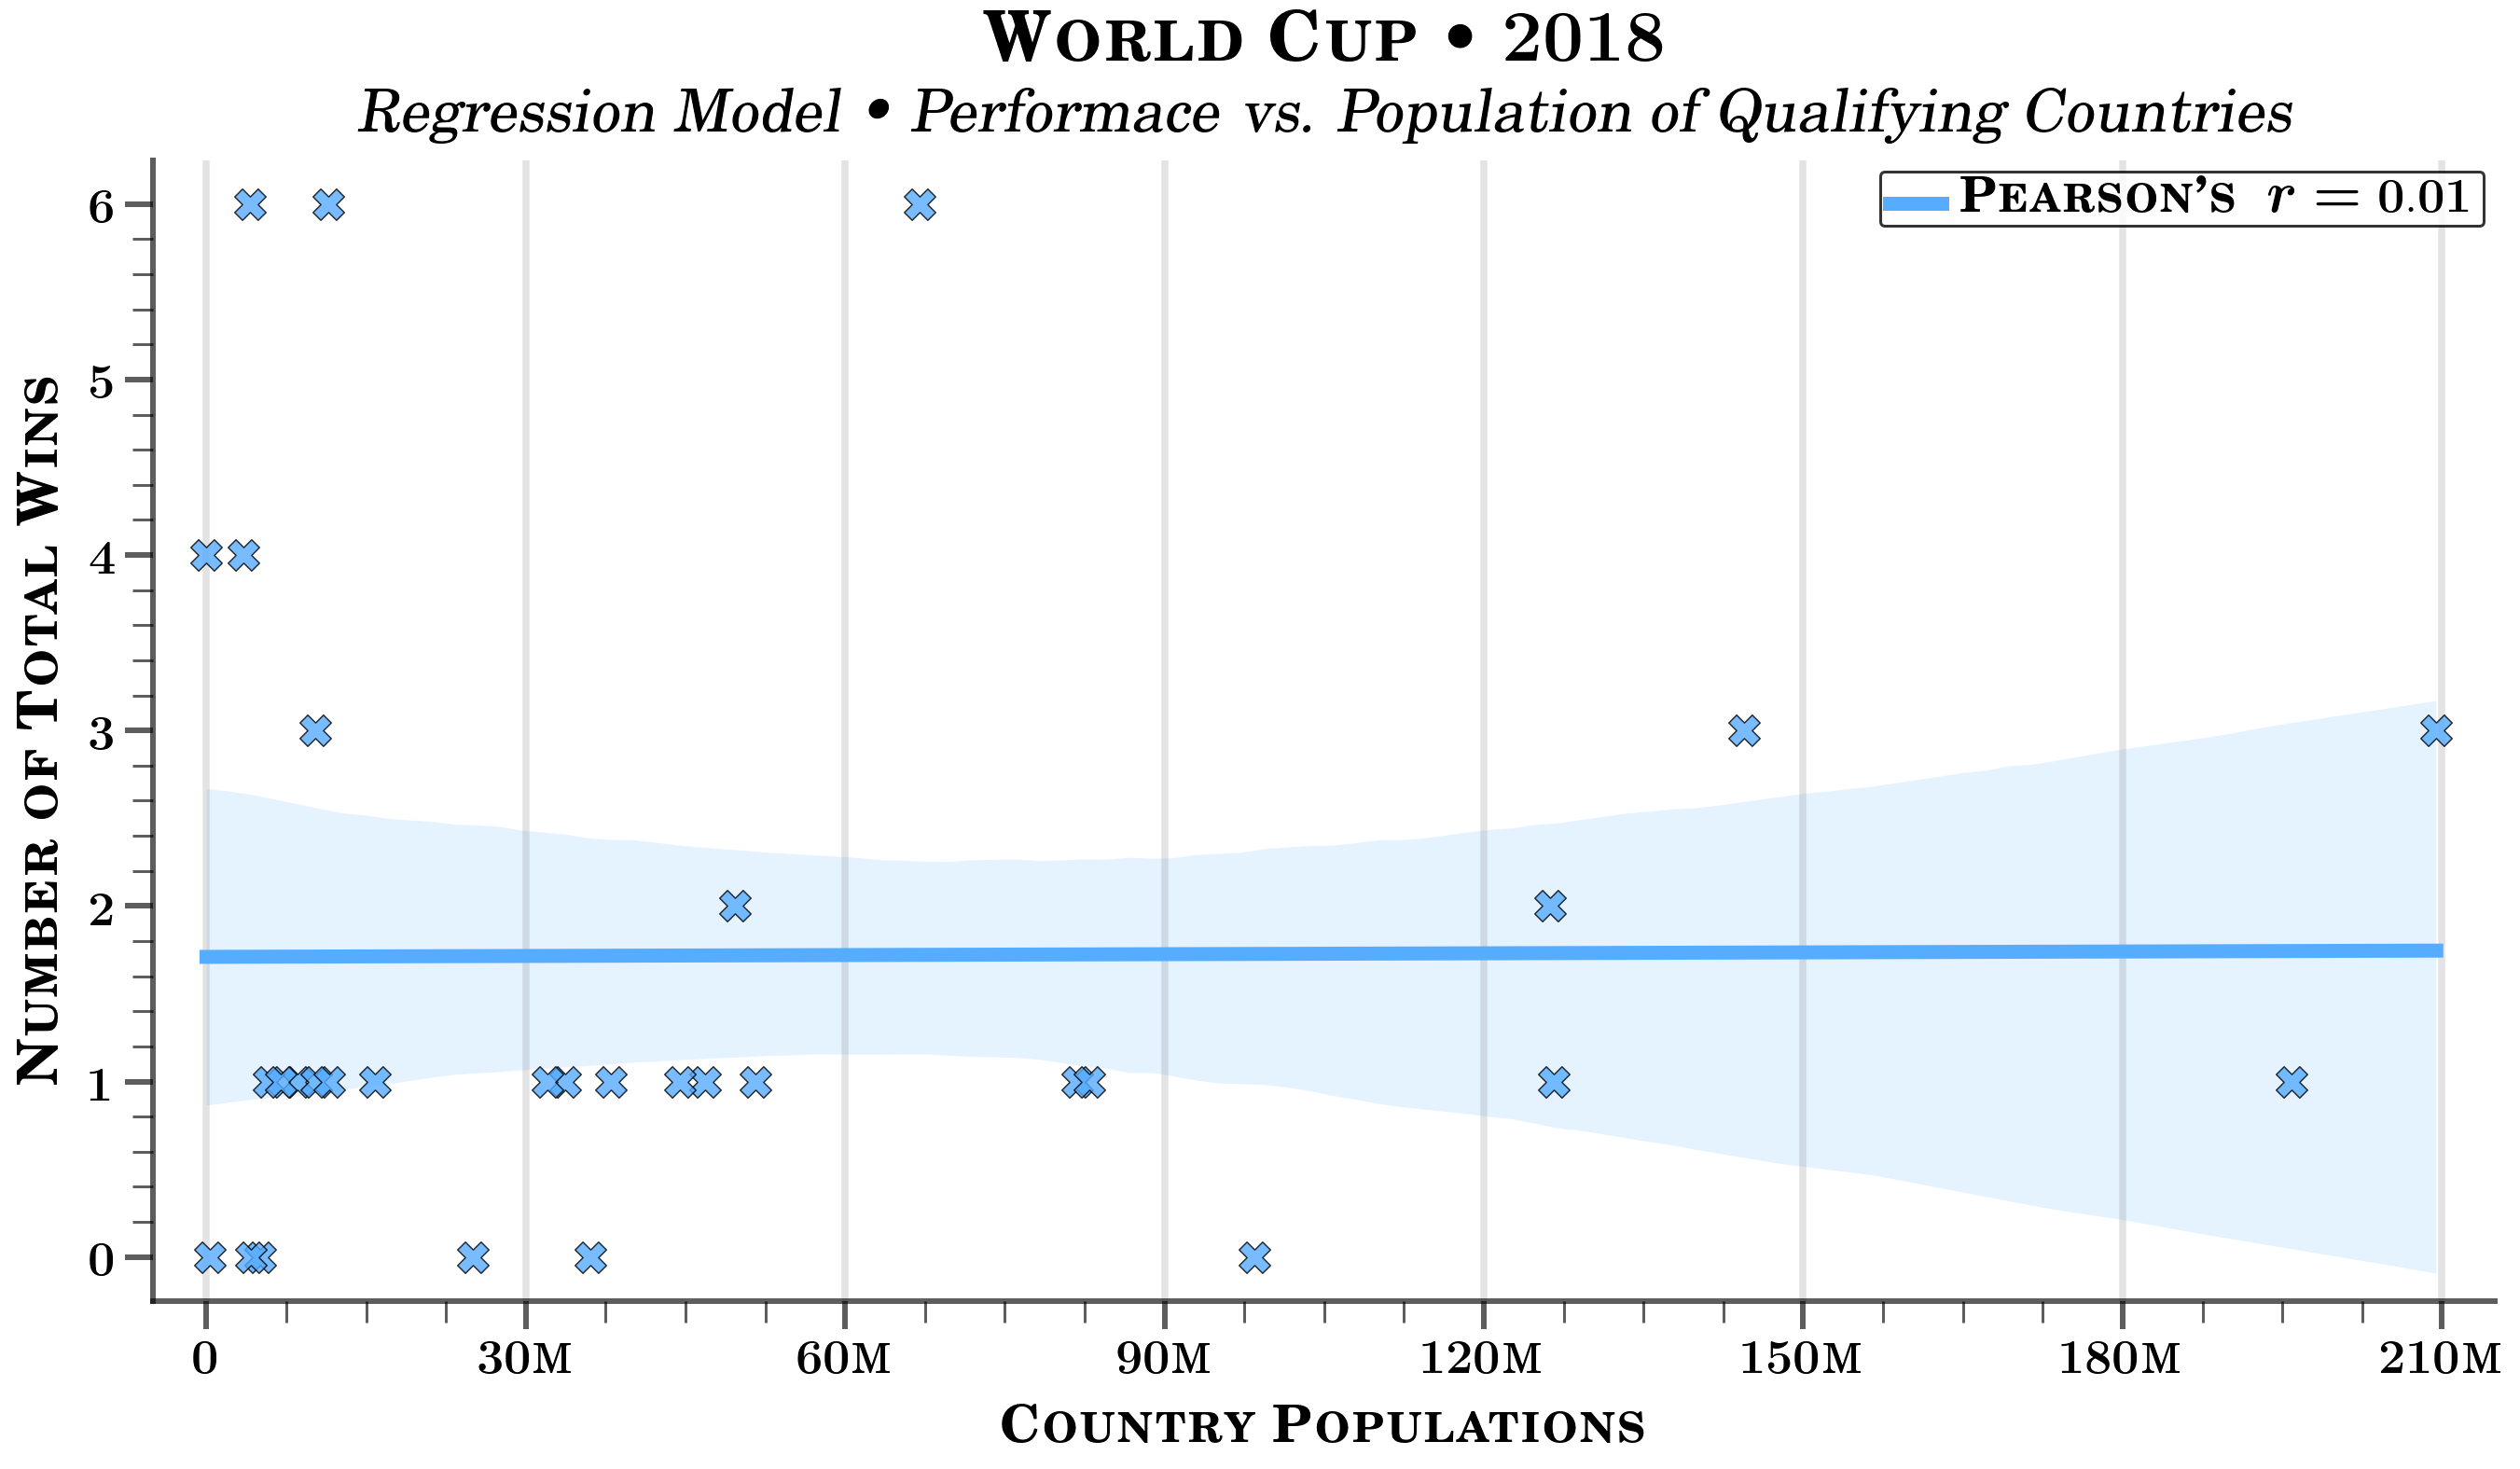

In [64]:
# Constructing temp df and removing and mainupulating data
#################################################################################################
for team in list(final_table.keys())[:1]:
    df_cols = final_table[team].keys()
#------------------------------------------------------------------------------------------------
table_df = pd.DataFrame(final_table.values(), index=final_table.keys(), columns=df_cols)
#------------------------------------------------------------------------------------------------
kn_w_array = np.array(table_df['Kn_W'])
gr_w_array = np.array(table_df['Gr_W'])
pop_ser = np.array(table_df['Population'].apply(float))
pop_ser = np.nan_to_num(pop_ser)
#------------------------------------------------------------------------------------------------
total_wins = np.add(kn_w_array, gr_w_array)
#------------------------------------------------------------------------------------------------
pear_r = np.corrcoef(pop_ser, total_wins)[0][1]

# Function to format population ticks
#################################################################################################
def format_pop(x, pos):
    if x>=1e9:
        s = r'{$\mathbf{'+'{:.3f}'.format(x*1e-9)+'}$'+   \
            r'{\fontsize{18}{0}\selectfont{\scshape{B}}}'
    if 1e6<=x<1e9:
        s = r'{$\mathbf{'+'{:.0f}'.format(x*1e-6)+'}$'+   \
            r'{\fontsize{18}{0}\selectfont{\scshape{M}}}'
    if 1e3<=x<1e6:
        s = r'{$\mathbf{'+'{:.0f}'.format(x*1e-3)+'}$'+   \
            r'{\fontsize{18}{0}\selectfont{\scshape{Th}}}'
    if 0<x<1e3:
        s = r'{$\mathbf{'+'{:.0f}'.format(x)+'}$'
    if x==0 or x<0:
        s = r'{$\mathbf{'+str(0)+'}$'
    return s

# Setting up the figure and the axes
#################################################################################################
fig = plt.figure(figsize=(18,9), dpi=180)
gs = fig.add_gridspec(1)
ax  = gs.subplots()
renderer = fig.canvas.get_renderer()

# Plotting the data and setting the ticks, tick labels, bounds and labels for both axis in both 
# plots
#################################################################################################
faded_color = get_lighter_color('dodgerblue', .27)
#------------------------------------------------------------------------------------------------
sc_kw = dict(s=180, lw=.6, ec='k', zorder=9)
line_kw = dict(lw=6)
#------------------------------------------------------------------------------------------------
sns.regplot(x=pop_ser, y=total_wins, ax=ax, color=faded_color, marker='X', 
            scatter_kws=sc_kw, line_kws=line_kw)

# Setting both the x and y ticks, tick labels, bounds and labels for both plots
#################################################################################################
ax.set_yticks(range(0,10))
ax.set_yticklabels(r'$\mathbf{'+str(tick)+'}$' for tick in range(0,10))
ax.set_ybound(-.25,6.25)
#------------------------------------------------------------------------------------------------
x_max = pop_ser.max()
#------------------------------------------------------------------------------------------------
right_found = False
test_x = 1*1e7
while not (right_found):
    if x_max<=test_x:
        x_max = test_x
        right_found = True
    else:
        test_x += 1*1e7
#------------------------------------------------------------------------------------------------
x_step = x_max/7
#------------------------------------------------------------------------------------------------
x_tick_max = x_max 
x_ticks = np.arange(0, x_tick_max+1, x_step)
#------------------------------------------------------------------------------------------------
ax.set_xticks(x_ticks)
ax.xaxis.set_major_formatter(format_pop)
ax.set_xbound(-5*1e6, x_tick_max+5*1e6)

# Tick Params
#################################################################################################
grid_kw = dict(color='dimgrey', linewidth=3, zorder=0)
maj_gr_kw = dict(length=12, width=2.4, labelsize=21, labelcolor='k', color=(0,0,0,.63))
min_gr_kw = dict(length=9, width=1.2, color=(0,0,0,.63))
#------------------------------------------------------------------------------------------------
maj_reg_kw = dict(length=12, width=2.4, labelsize=21, labelcolor='k', color=(0,0,0,.63))
#------------------------------------------------------------------------------------------------
right_spine_kw = dict(color='dimgrey', linewidth=3, zorder=0, alpha=.09)
spine_kw = dict(color='k', lw=2.4, alpha=.63, zorder=9)
#------------------------------------------------------------------------------------------------
ax.minorticks_on()
ax.grid(True, which='major', axis='x', alpha=.18, **grid_kw)
#------------------------------------------------------------------------------------------------
ax.tick_params('x', **maj_gr_kw)
ax.tick_params('x', which='minor', **min_gr_kw)
#------------------------------------------------------------------------------------------------
ax.tick_params('y', **maj_reg_kw)
ax.tick_params('y', which='minor', **min_gr_kw)
#------------------------------------------------------------------------------------------------
[ax.spines[side].update(spine_kw) for side in spine_sides]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#------------------------------------------------------------------------------------------------
ax.yaxis.get_minor_ticks()[0].set_visible(False)
ax.yaxis.get_minor_ticks()[-1].set_visible(False)

# Setting the titles 
#################################################################################################
lab_kw = dict(labelpad=9)
tit_kw = dict(pad=12, linespacing=1.5)
#------------------------------------------------------------------------------------------------
ax.set_ylabel(r'\textbf{\scshape{Number of Total Wins}}', size=24, **lab_kw)
ax.set_xlabel(r'\textbf{\scshape{Country Populations}}', size=22.5, **lab_kw)
#------------------------------------------------------------------------------------------------
tit_m = r'{\fontsize{30}{0}\selectfont{\textbf{\scshape{World Cup \textbullet\ }}}}'+   \
        r'{\fontsize{31.5}{0}\selectfont{$\mathbf{2018}$}'+'\n'+   \
        r'{\fontsize{25.5}{0}\selectfont{\textsl{Regression Model \textbullet\ Performace }'\
        r'{\fontsize{25.5}{0}\selectfont{\textsl{vs. Population of Qualifying Countries }'
#------------------------------------------------------------------------------------------------
ax.set_title(tit_m, **tit_kw)

# Setting legend, saving the plot, and showing the plots
#################################################################################################
leg_kw = dict(bbox_to_anchor=(1,1), loc='upper right', labelspacing=.63, handlelength=2.25)
frame_kw = dict(lw=1.2, ec='k')
#------------------------------------------------------------------------------------------------
leg_text = [r"{\fontsize{21}{0}\selectfont{\textbf{\scshape{Pearson's }}"+   \
            r'{\fontsize{24}{0}\selectfont{\ $\boldsymbol{r}$\ $\boldsymbol{=}$\ }}'+   \
            r'{\fontsize{21}{0}\selectfont{$\mathbf{'+'{:.2f}'.format(pear_r)+'}$}}']
leg_line = [mlines.Line2D([],[], color=faded_color, lw=6)]
leg = ax.legend(handles=leg_line, labels=leg_text, **leg_kw)
#------------------------------------------------------------------------------------------------
plt.setp(leg.get_frame(), **frame_kw)

# Saving and showing the plots
#################################################################################################
fig.savefig('visuals\Performance vs Population.jpeg', format='jpeg', bbox_inches='tight')
#------------------------------------------------------------------------------------------------
plt.show()

# End of My Version